In [1]:
import cv2
import numpy as np
import io
import os
from matplotlib import pyplot as plt
# Clustering THETAs of the Google boxes
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances


# Set printing options
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

def plot_img(img, show = True):

    fig = plt.figure(figsize = (16,12))
    plt.imshow(img, interpolation = 'none')
    #plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    if show:
        plt.show()

google_res = {}

In [9]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:\\Users\\DenisStark\\AndroidStudioProjects\\biblosphere\\python.json"

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
IMAGEFILE = "shelves/6.jpg"

# Loads the image into memory
with io.open(IMAGEFILE, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

# Performs label detection on the image file
#response = client.label_detection(image=image)
#labels = response.label_annotations
response = client.document_text_detection(image=image)
google_res[IMAGEFILE] = response

#print('Response:', response)

In [10]:
#print(response.full_text_annotation.text)

for p in response.full_text_annotation.pages:
    for b in p.blocks:
        text = ''
        for par in b.paragraphs:
            for w in par.words:
                for s in w.symbols:
                    text = text + s.text
                text = text + ' '
            text = text + '\n'

        print('BLOCK: ', text)

BLOCK:  paperbe 
indus iation 

BLOCK:  SIL 

BLOCK:  LONGMAN 

BLOCK:  DICTIONNAIRE nary СЛОВАРЬ 

BLOCK:  Russe Français 

BLOCK:  Français 
Russe 

BLOCK:  CIAO , ITALIA ! 

BLOCK:  Карло Анчидеи 

BLOCK:  Langenscheidt 

BLOCK:  Итальянская грамматика — кратко и просто 

BLOCK:  HEMBUKO 

BLOCK:  НЕМЕЦКО - РУССКИЙ СЛОВАРЬ 

BLOCK:  РУССКО - ИТАЛЬЯНСКИЙ разговорим 

BLOCK:  TIONA 

BLOCK:  635 

BLOCK:  CAN 0467 49619 - 0 

BLOCK:  REFERENCE 

BLOCK:  RUSSIAN - ENGLISH ROMANOV ' S 
У ENGLISH - RUSSIAN 

BLOCK:  РУССКО - АНГЛИЙСКИЙ СЛОВАРЬ КРЫЛАТЫХ СЛОВ 

BLOCK:  + РУССКО - НЕМЕЦКИЙ СЛОВАРЬ - 

BLOCK:  MUARD 

BLOCK:  РІОС 

BLOCK:  Разговорные темы по немецкому языку 

BLOCK:  Э . Н . Большакова 

BLOCK:  ПРАЗДНИК ДЛИНОЮ В УЧЕБНЫЙ ГОД 

BLOCK:  МЕТОДИЧЕСКИЕ РЕКОМЕНДАЦИИ ДЛЯ УЧИТЕЛЕЙ СРЕДНИХ ШКОЛ 

BLOCK:  ОКИ ЛИХАЧЕВА 

BLOCK:  ( 1993 ) 

BLOCK:  РУССКАЯ РЕЧЬ 

BLOCK:  LOIN 

BLOCK:  5 СЕНСАЦИЙ 

BLOCK:  Александр Драгункин 

BLOCK:  Е 

BLOCK:  . И ТЭР ҚРІ PLSIVE 0 . 109011 S SXKOV

In [ ]:
!git clone git://github.com/opencv/opencv_extra.git/testdata/cv/ximgproc/

In [23]:
IMAGEFILE = "shelves/3.jpg"
img = cv2.imread(IMAGEFILE)

IMSIZE = 512
if img.shape[1] != IMSIZE:
    ratio = IMSIZE/img.shape[1]
    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio)


print(cv2.ximgproc."model1.yml.gz")

AttributeError: module 'cv2.ximgproc' has no attribute 'model1'

In [ ]:
    
edge_detection = cv2.ximgproc.createStructuredEdgeDetection(model)
    rgb_im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    edges = edge_detection.detectEdges(np.float32(rgb_im) / 255.0)

    orimap = edge_detection.computeOrientation(edges)
    edges = edge_detection.edgesNms(edges, orimap)

    edge_boxes = cv.ximgproc.createEdgeBoxes()
    edge_boxes.setMaxBoxes(30)
    boxes = edge_boxes.getBoundingBoxes(edges, orimap)

    for b in boxes:
        x, y, w, h = b
        cv.rectangle(im, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA)

    cv.imshow("edges", edges)
    cv.imshow("edgeboxes", im)


Use Superpixels to minimize resolution for further analysis 

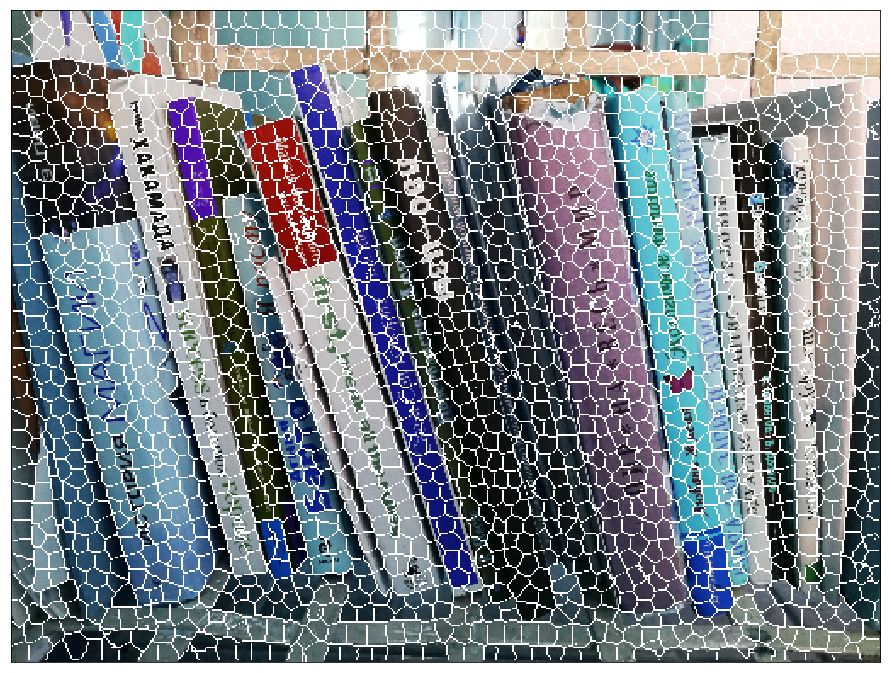

In [22]:
IMAGEFILE = "shelves/3.jpg"
img = cv2.imread(IMAGEFILE)

IMSIZE = 512
if img.shape[1] != IMSIZE:
    ratio = IMSIZE/img.shape[1]
    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio)

#converted = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#converted = np.float32(converted)

slic = cv2.ximgproc.createSuperpixelSLIC(img, algorithm=cv2.ximgproc.SLICO, region_size=10)

slic.iterate()

pixels = slic.getLabelContourMask()

img[pixels==255] = 255

plot_img(img, show=True)

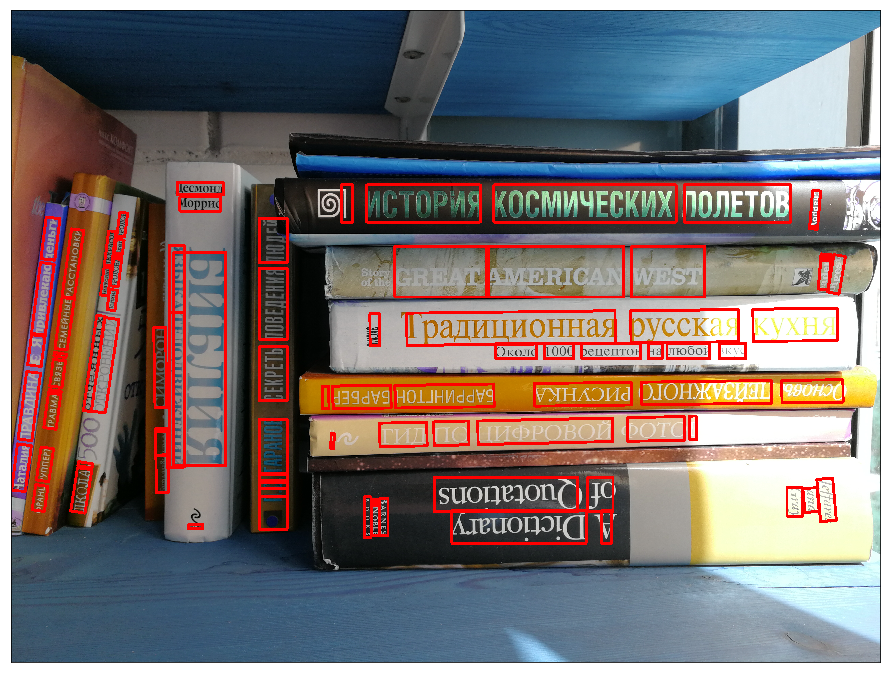

In [16]:
IMAGEFILE = "shelves/9.jpg"
response = google_res[IMAGEFILE]

oimg = cv2.imread(IMAGEFILE)
ratio = 1

boxes = []
#segms = []
for p in response.full_text_annotation.pages:
    for b in p.blocks:
        for par in b.paragraphs:
            for w in par.words:
                v = w.bounding_box.vertices
                #v = par.bounding_box.vertices
                x1, y1 = int(v[0].x * ratio), int(v[0].y * ratio)
                x2, y2 = int(v[1].x * ratio), int(v[1].y * ratio)
                x3, y3 = int(v[2].x * ratio), int(v[2].y * ratio)
                x4, y4 = int(v[3].x * ratio), int(v[3].y * ratio)
                boxes.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
                #segms.append(SegmToCartesian([x1, y1], [x2, y2], weight=10000))
                #segms.append(SegmToCartesian([x2, y2], [x3, y3]))
                #segms.append(SegmToCartesian([x3, y3], [x4, y4], weight=10000))
                #segms.append(SegmToCartesian([x4, y4], [x1, y1]))
        
boxes = np.array(boxes)
#segms = np.array(segms)

timg = np.copy(oimg)
color = (255, 0, 0)
for b in boxes:
    cv2.drawContours(timg, [b], 0, color, 15)

plot_img(timg, show=True)

In [6]:
def VLineDistance(s1, s2):
    x1, y1, x2, y2 = s1
    x3, y3, x4, y4 = s2
    
    if abs(np.average((x1, x2)) - np.average((x3, x4))) > V_X_TH:
        return 1
    
    mi1, ma1 = min(y1, y2), max(y1, y2)
    mi2, ma2 = min(y3, y4), max(y3, y4)
    
    if min(ma2-mi1, ma1-mi2) < - V_Y_GAP:
        return  1
    
    return 0

def HLineDistance(s1, s2):
    x1, y1, x2, y2 = s1
    x3, y3, x4, y4 = s2
    
    if abs(np.average((y1, y2)) - np.average((y3, y4))) > H_Y_TH:
        return 1
    
    mi1, ma1 = min(x1, x2), max(x1, x2)
    mi2, ma2 = min(x3, x4), max(x3, x4)
    
    if min(ma2-mi1, ma1-mi2) < - H_X_GAP:
        return  1

    return 0

In [4]:
S_BLUR = 5
S_CANNY_TH1 = 10
S_CANNY_TH2 = 200

# Parameters to identify segment of lines after HoughLine search:
# Minimum DBSCAN_MIN_SAM points in the DBSCAN_EPS distance in the line of width S_WIDTH 
# to consider it part of the line segment
S_WIDTH = 3 #best
DBSCAN_EPS=11 # best
DBSCAN_MIN_SAM=20 # best
S_MINLEN = 25 # best
S_K_ANGLE = 0.02 * np.pi # best
S_HOUGH_TH=40

# Angle to filter horizontal and vertical lines on book blocks
B_ANGLE=0.01 * np.pi

# Angle to include text box into core boxes for single book
B_THETA=0.02 * np.pi

# Angle to not add blocks 
M_ANGLE=0.03 * np.pi

V_X_TH = 5
V_Y_GAP = 5
H_Y_TH = 10
H_X_GAP = 5


In [144]:
def FindSegments(lines, img, angrange=None, p_minline=S_MINLEN, p_width=S_WIDTH, p_eps=DBSCAN_EPS, p_minsam=DBSCAN_MIN_SAM):
    h, w = img.shape[0:2]
    # Filter lines if ranges given
    if angrange is not None:
        filt_lines = np.empty((0, 1, 2), dtype = lines.dtype)
        for r in angrange:
            filt_lines = np.append(filt_lines, lines[(lines[:, 0, 1] >= r[0]) & (lines[:, 0, 1] < r[1])], axis=0)
        lines = filt_lines
    
    keys = []
    for l in lines:
        rho, theta = l[0]
        x1, y1, x2, y2 = 0, 0, 0, 0
        # Process separetely lines near horizontal and vertical 
        # to avoid division to near 0
        if np.pi * 0.25 < theta < np.pi * 0.75:
            x1, y1 = 0, int(rho / np.sin(theta))
            x2, y2 = w - 1, int(y1 - w * np.tan(0.5 * np.pi - theta))
        else:
            x1, y1 = int(rho / np.cos(theta)), 0
            x2, y2 = int(x1 - h * np.tan(theta)), h - 1
        
        # find intercestion between line and image borders
        res, (x1, y1), (x2, y2) = cv2.clipLine((0, 0, w-2, h-2), (x1, y1), (x2, y2))
        
        if x1==x2 and y1==y2:
            continue
        
        if np.pi * 0.25 < theta < np.pi * 0.75:
            pts = np.zeros(((x2-x1+1)*min(p_width, 5), 2), dtype=int)
            x = np.arange(x1, x2+1)
            #print('X: ', x)
            y = np.uint(np.around((x - x1) * (y2 - y1) / (x2 - x1) + y1))
            pts[:,0] = np.repeat(x, min(p_width, 5))
            if p_width == 1:
                pts[:,1] = y
            elif p_width == 2:
                pts[:,1] = np.reshape([y, y+1], -1, order='F')
            elif p_width == 3:
                pts[:,1] = np.reshape([y-1, y, y+1], -1, order='F')
            elif p_width == 4:
                pts[:,1] = np.reshape([y-1, y, y+1, y+2], -1, order='F')
            elif p_width >= 5:
                pts[:,1] = np.reshape([y-2, y-1, y, y+1, y+2], -1, order='F')
        else:
            pts = np.zeros(((y2-y1+1)*min(p_width, 5), 2), dtype=int)
            y = np.arange(y1, y2+1)
            #print('Y: ', y)
            x = np.uint(np.around((y - y1) * (x2 - x1) / (y2 - y1) + x1))
            #print('X: ', x)
            pts[:,1] = np.repeat(y, min(p_width,5))
            if p_width == 1:
                pts[:,0] = x
            elif p_width == 2:
                pts[:,0] = np.reshape([x, x+1], -1, order='F')
            elif p_width == 3:
                pts[:,0] = np.reshape([x-1, x, x+1], -1, order='F')
            elif p_width == 4:
                pts[:,0] = np.reshape([x-1, x, x+1, x+2], -1, order='F')
            elif p_width >= 5:
                pts[:,0] = np.reshape([x-2, x-1, x, x+1, x+2], -1, order='F')

        # Exclude ponts outside the image
        pts = pts[(pts[:,0]>=0) & (pts[:,0]<w) & (pts[:,1]>=0) & (pts[:,1]<h) ]

        line = img[pts[:,1], pts[:,0]]

        dots = np.zeros((np.sum(line>0), 2))
        dots[:,0] = pts[:,0][line>0]
        dots[:,1] = pts[:,1][line>0]
        if len(dots) == 0:
            continue
        
        clustering = DBSCAN(eps=p_eps, min_samples=p_minsam).fit(dots)
        #print(clustering.labels_)

        for c in range(0, np.amax(clustering.labels_)+1):
            start_i = np.amin(np.where(clustering.labels_ == c))
            end_i = np.amax(np.where(clustering.labels_ == c))
            weight = np.sum(clustering.labels_ == c)
            pt_start = dots[start_i]
            pt_end = dots[end_i]
            #keys.append(SegmToCartesian(pt_start, pt_end, weight=w))
            if np.sqrt(np.sum((pt_start - pt_end)**2)) > p_minline:
                #keys.append(SectToCartesian(w, h, pt_start, pt_end, theta, rho, weight))
                keys.append([pt_start, pt_end])
    
    return np.int32(np.array(keys))


def MergeVSegments(segm):
    v_len = np.sqrt(np.sum((segm[:, 0]-segm[:, 1])**2, axis=1))
    max_len = np.argmax(v_len)
    
    pts = np.reshape(segm, (-1, 2))
    min_y = np.amin(pts[:, 1])
    max_y = np.amax(pts[:, 1])
    x = np.average((segm[max_len, 0, 0], segm[max_len, 1, 0]))
    return np.int32(np.array([[x, min_y], [x, max_y]]))


def MergeHSegments(segm):
    pts = np.reshape(segm, (-1, 2))
    min_x = np.amin(pts[:, 0])
    max_x = np.amax(pts[:, 0])
    y = np.average(pts[:, 1])
    return np.int32(np.array([[min_x, y], [max_x, y]]))


def FromCartesian(theta, rho, eps):
    if theta < 0:
        theta = theta + np.pi
        
    if theta > np.pi * 0.625:
        eps = - eps

    x = - eps * np.sin(theta) + rho * np.cos(theta)
    y = eps * np.cos(theta) + rho * np.sin(theta)
    return int(x), int(y)

# Return intersection point of two lines defined by two points
def GetIntersection(a1, a2, b1, b2):
    p = np.array(a1)
    q = np.array(b1)
    r = np.array(a2) - np.array(a1)
    s = np.array(b2) - np.array(b1)

    if np.cross(r,s) == 0:
        return None

    t = np.cross(q-p,s)/np.cross(r,s)

    intersection = p + t * r
    return intersection


def SectToCartesian(w, h, pt_start, pt_end, theta, rho, weight):
    if theta <= np.pi * 0.25:
        eps = (pt_start[1] + pt_end[1])/2/np.cos(theta) - rho * np.tan(theta)
    elif theta <= np.pi * 0.625:
        eps = rho / np.tan(theta) - (pt_start[0] + pt_end[0])/2/np.sin(theta)
    else:
        eps = rho * np.tan(theta) - (pt_start[1] + pt_end[1])/2/np.cos(theta)
    
    key_theta = theta
    
    if key_theta > np.pi * 0.625:
        key_theta = np.pi - theta

    # Length of the section
    delta = np.sqrt((pt_end[0] - pt_start[0])**2 + (pt_end[1] - pt_start[1])**2)
    return [theta, rho, eps, delta, weight]


def SegmToCartesian(pt_start, pt_end, weight=0):
    x1, y1, x2, y2 = pt_start[0], pt_start[1], pt_end[0], pt_end[1]
    if y2 == y1:
        theta = np.pi * 0.5
    else:
        theta = np.arctan((x2-x1)/(y1-y2))
    
    if theta < 0:
        theta = theta + np.pi

    rho = x1 * np.cos(theta) + y1 * np.sin(theta) 
    
    if theta <= np.pi * 0.25:
        eps = (y1 + y2)/2/np.cos(theta) - rho * np.tan(theta)
    elif theta <= np.pi * 0.625:
        eps = rho / np.tan(theta) - (x1 + x2)/2/np.sin(theta)
    else:
        eps = rho * np.tan(theta) - (y1 + y2)/2/np.cos(theta)
    
    # Length of the section
    delta = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if delta < 1:
        delta = 1
    return [theta, rho, eps, delta, weight]


def LineSide(p1, p2, p):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]
    x, y = p[0], p[1]
    return np.sign((x2-x1)*(y-y1) - (y2-y1)*(x-x1))
    

def IsInside(box, p):
    p1, p2, p3, p4 = box[0], box[1], box[2], box[3]
    s1 = LineSide(p1, p2, p)
    s2 = LineSide(p2, p3, p)
    s3 = LineSide(p3, p4, p)
    s4 = LineSide(p4, p1, p)
    
    return s1 == s2 == s3 == s4

# Function to calculate box keys
def BoxKeys(b, adjust_theta=False):
    x1, y1 = b[0]
    x2, y2 = b[1] 
    x3, y3 = b[2] 
    x4, y4 = b[3]
    if x2 == x1:
        theta = np.pi * 0.5
    else:
        theta = np.arctan((y1-y2)/(x1-x2))
            
    if theta < - 0.375 * np.pi:
        theta = theta + np.pi
            
    x, y = (x1 + x3)//2, (y1+y3)//2
    diag = np.sqrt((x1-x3)**2 + (y1-y3)**2)
    w = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    h = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    
    #If second side is longet take theta along it
    if adjust_theta:
        if (x2-x1)**2 + (y2-y1)**2 < (x3-x2)**2 + (y3-y2)**2:
            w, h = h, w
            if x3 == x2:
                theta = np.pi * 0.5
            else:
                theta = np.arctan((y2-y3)/(x2-x3))
            
            if theta < - 0.375 * np.pi:
                theta = theta + np.pi
            
    return np.array([theta, x, y, w, h, diag])


def RectFromKeys(theta, x, y, w, h):
    dx1 = (w*np.cos(theta) + h*np.sin(theta))//2
    dx2 = (-w*np.cos(theta) + h*np.sin(theta))//2
    dy1 = (w*np.sin(theta) - h*np.cos(theta))//2
    dy2 = (w*np.sin(theta) + h*np.cos(theta))//2
    return np.int32(np.array([[[x-dx1, y-dy1], [x+dx2, y-dy2], [x+dx1, y+dy1], [x-dx2, y+dy2]]]))


def SegmentBook(img, book, boxes, box_idx, near_idxs, trace=True):
    contours = np.empty((near_idxs.shape[0]+2, 4, 2))
    contours[0] = book
    contours[1] = boxes[box_idx]
    contours[2:] = boxes[near_idxs]
    
    if trace:
        timg = np.copy(img)
        color = 255
        cv2.drawContours(timg, [book], 0, color, 15)
        color = 128
        cv2.drawContours(timg, boxes[near_idxs], -1, color, 3)
        color = 64
        cv2.drawContours(timg, [boxes[box_idx]], 0, color, 15)
        plot_img(timg, show=True)
    
    x1, y1 = boxes[box_idx][0]
    x2, y2 = boxes[box_idx][1] 
    x3, y3 = boxes[box_idx][2] 
    x4, y4 = boxes[box_idx][3] 
    if x2 == x1:
        theta = np.pi * 0.5
    else:
        theta = np.arctan((y1-y2)/(x1-x2))
    box_length = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    box_height = np.sqrt((x2-x3)**2 + (y2-y3)**2)

    # Angle for rotation
    theta = theta - 0.5 * np.pi
 
    x, y, w, h = cv2.boundingRect(book)
    if x < 0:
        w = w + x
        x = 0

    if y < 0:
        h = h + y
        y = 0

    rx = w//2
    ry = h//2
  
    # crop source
    img_crop = img[y:y + h, x:x + w]
    contours[:, :, 0] = contours[:, :, 0] - x
    contours[:, :, 1] = contours[:, :, 1] - y
    x_shift1, y_shift1 = x, y

    if trace:
        print('Image before rotation: ', img_crop.shape)
        #plot_img(img_crop, show=True)
        print('Bounding rectangle: ', x, y, w, h)
        print('Rotation centre: ', rx, ry)
        
    # grab the rotation matrix
    M = cv2.getRotationMatrix2D((rx, ry), theta / np.pi * 180, 1)
    
    # grab the sine and cosine (i.e., the rotation components of the matrix)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - rx
    M[1, 2] += (nH / 2) - ry
 
    # rotate box, book and near boxes
    contours_rot = np.int0(cv2.transform(contours, M))
    book_rot = contours_rot[0]
    box_rot = contours_rot[1]
    near_boxes_rot = contours_rot[2:]
    #print('Near boxes rotation shape: ', near_boxes.shape, near_boxes_rot.shape)

    # Rotate image
    img_rot = cv2.warpAffine(img_crop, M, (nW, nH))

    if trace:
        print('Image after rotation: ', img_rot.shape)
        #plot_img(img_rot, show=True)

    mask = np.zeros(img_rot.shape[0:2])
    cv2.drawContours(mask, np.array([book_rot]), -1, 255, -1)
    img_masked = np.zeros_like(img_rot)
    img_masked[mask == 255] = img_rot[mask == 255]

    # crop
    x, y, w, h = cv2.boundingRect(book_rot)
    if x < 0:
        w, x = w - x, 0

    if y < 0:
        h, y = h - y, 0

    img_crop = img_masked[y:y + h, x:x + w]
    contours_rot[:, :, 0] = contours_rot[:, :, 0] - x
    contours_rot[:, :, 1] = contours_rot[:, :, 1] - y
    x_shift2, y_shift2 = x, y
    
    if trace:
        print('Image cropped:', img_crop.shape)
        #plot_img(img_crop, show=True)

    edges = img_crop
    edges_glob = np.copy(img_crop)
   
    # Loop throught near boxes and join core bixes together
    # Calculate keys (theta, coordinates of center and diagonal length) for near boxes
    keys = np.empty((near_boxes_rot.shape[0], 6))
    for i, b in enumerate(near_boxes_rot):
        keys[i] = BoxKeys(b)

    # Keys for initial box
    theta, x, y, w, h, diag = BoxKeys(box_rot)
    
    core_idxs = np.argwhere((keys[:, 1] > x - h//2) & (keys[:, 1] < x + h//2) & (keys[:, 0] > theta - B_THETA) & (keys[:, 0] < theta + B_THETA))

    # Include ortoganal boxes in the core (NOT A GOOD IDEA)
    #ort_theta = theta - 0.5 * np.pi 
    #if ort_theta < - np.pi * 0.375:
    #    ort_theta = ort_theta + np.pi
    
    #ort_idxs = np.argwhere((keys[:, 1] > x - h//2) & (keys[:, 1] < x + h//2) & (keys[:, 0] > ort_theta - B_THETA) & (keys[:, 0] < ort_theta + B_THETA))
    if trace:
        print('Core boxes found: ', len(core_idxs))
        print(keys[core_idxs])
        #print('Ort boxes found: ', len(ort_idxs), near_boxes_rot[ort_idxs])
        #print(keys[ort_idxs])
        timg = np.zeros_like(edges)
        color = 255
        cv2.drawContours(timg, near_boxes_rot[core_idxs], -1, color, 15)
        #color = 128
        #cv2.drawContours(timg, near_boxes_rot[ort_idxs], -1, color, 15)
        plot_img(timg, show=True)
    
    #core_idxs = np.append(core_idxs, ort_idxs)
    core_rect = cv2.minAreaRect(near_boxes_rot[core_idxs].reshape(-1, 2))
    core_rect = np.int0(cv2.boxPoints(core_rect))
    c_theta, c_x, c_y, c_w, c_h, diag = BoxKeys(core_rect, adjust_theta=True)

    # Mask area of core rectangle
    cv2.drawContours(edges, [core_rect], 0, 0, -1)

    other_idxs = np.arange(0, len(near_boxes_rot))
    other_idxs = other_idxs[np.isin(other_idxs, core_idxs, invert=True)]
    
    if trace:
        print('Total boxes: ', len(near_boxes_rot))
        print('Core boxes: ', len(core_idxs), core_idxs)
        print('Other boxes: ', len(other_idxs), other_idxs)
        timg = np.zeros_like(edges)
        color = 255
        cv2.drawContours(timg, [core_rect], 0, color, 5)
        color = 128
        cv2.drawContours(timg, near_boxes_rot[other_idxs], -1, color, 5)
        plot_img(timg, show=True)

    #box_rot
    #book_rot
    #near_boxes_rot
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, S_HOUGH_TH)
    #print(len(lines))
    
    # Extract nearly vertical and horizontal lines
    angles = np.array([[0, B_ANGLE], [np.pi - B_ANGLE, np.pi]])
    v_lines = FindSegments(lines, edges, angrange=angles, p_minline=c_h * 0.2)

    if trace:
        print('Vertical lines: ', len(v_lines))
        timg = np.zeros_like(edges)
        color = 255
        for l in v_lines:
            color = np.random.randint(128, 255)
            x1, y1 = l[0]
            x2, y2 = l[1]
            cv2.line(timg, (x1, y1), (x2, y2), color, 5)

        plot_img(timg, show=True)

    # Group close segments into single one
    # First group then filter intersections
    # Find connected line segment to group
    if len(v_lines) > 1:
        AA = pairwise_distances(v_lines.reshape((v_lines.shape[0],-1)), metric=VLineDistance)
        db = DBSCAN(eps=0.5, min_samples=2, metric="precomputed").fit(AA)
        Z = db.labels_
        
        # Size of array for keys for filtered segments. Number of ungroupped (-1) plus 
        # number of groups
        ungrouped, groups = np.sum(Z == -1), np.amax(Z) + 1
    
        filt_seg = np.zeros((ungrouped + groups, 2, 2), dtype=np.int32)
        filt_seg[0:ungrouped, :, :] = v_lines[Z == -1]
    
        for i in range(0, np.amax(Z)+1):  
            filt_seg[ungrouped+i, :, :] = MergeVSegments(v_lines[Z == i])
        
        # Only keep lines longer than text box length
        v_lines = filt_seg[np.sqrt(np.sum((filt_seg[:, 0]-filt_seg[:, 1])**2, axis=1)) > box_length/2]
        #print('V-lines filter by length (len, before, after): ', box_length, filt_seg.shape, v_lines.shape)

    angles = np.array([[0.5 * np.pi - B_ANGLE, 0.5 * np.pi + B_ANGLE]])
    h_lines = FindSegments(lines, edges, angrange=angles, p_minline=0)

    if trace:
        print('Cluster V-lines:', np.unique(Z))
        #timg = np.copy(edges)
        timg = np.zeros_like(edges)
        color = 255
        for l in h_lines:
            color = np.random.randint(128, 255)
            x1, y1 = l[0]
            x2, y2 = l[1]
            #print(x1, y1, x2, y2)
            cv2.line(timg, (x1, y1), (x2, y2), color, 5)

        plot_img(timg, show=True)
        print('H-lines count: ', len(h_lines))
        print(h_lines)

    # Group close segments into single one
    # First group then filter intersections
    # Find connected line segment to group
    if len(h_lines) > 1:
        AA = pairwise_distances(h_lines.reshape((h_lines.shape[0],-1)), metric=HLineDistance)
        db = DBSCAN(eps=0.5, min_samples=2, metric="precomputed").fit(AA)
        Z = db.labels_

        # Size of array for keys for filtered segments. Number of ungroupped (-1) plus 
        # number of groups
        ungrouped, groups = np.sum(Z == -1), np.amax(Z) + 1

        filt_seg = np.zeros((ungrouped + groups, 2, 2), dtype=np.int32)
        filt_seg[0:ungrouped, :] = h_lines[Z == -1]

        for i in range(0, np.amax(Z)+1):  
            filt_seg[ungrouped+i, :] = MergeHSegments(h_lines[Z == i])

        # Only keep lines longer than text box height
        h_lines = filt_seg[np.sqrt(np.sum((filt_seg[:, 0]-filt_seg[:, 1])**2, axis=1)) > box_height]
        #print('Filtered horizontal segments: ', len(h_lines))

    if trace:
        print('Cluster H-lines:', np.unique(Z))
        #timg = np.copy(edges)
        timg = np.zeros_like(edges)
        color = 255
        for l in v_lines:
            color = np.random.randint(128, 255)
            x1, y1 = l[0]
            x2, y2 = l[1]
            cv2.line(timg, (x1, y1), (x2, y2), color, 5)

        for l in h_lines:
            color = np.random.randint(128, 255)
            x1, y1 = l[0]
            x2, y2 = l[1]
            #print(x1, y1, x2, y2)
            cv2.line(timg, (x1, y1), (x2, y2), color, 5)
        
        color = 255
        cv2.drawContours(timg, [core_rect], 0, color, 5)

        plot_img(timg, show=True)

    h_img, w_img = img_crop.shape[0:2]
    #print('Height x Width: ', h, w)

    # Loop through not core boxes and check if there is line between the core and the box
    add_boxes = []
    for i in other_idxs:
        skip = False
        theta, x, y, w, h, diag = BoxKeys(near_boxes_rot[i])
        #print('Other box: ', theta / np.pi * 180, x, y, w, h)
        # Skip boxes outside the image
        if x < 0 or x > w_img-1 or y < 0 or y > h_img-1:
            #print('Skip outside')
            continue

        # Skip if angle is not the same (or not 90 degree)
        t_dif = abs(theta - c_theta)
        if t_dif > M_ANGLE and (t_dif < 0.5* np.pi - M_ANGLE or t_dif > 0.5 * np.pi + M_ANGLE):
            #print('Skip angle', theta * 180 / np.pi,  c_theta * 180 / np.pi, )
            continue
        
        for v in v_lines:
            x1, y1, x2, y2 = v[0,0], v[0,1], v[1,0], v[1,1]
            #if min(y1, y2) < min(y, c_y) and max(y1, y2) > max(y, c_y) and min(x, c_x) < (x1+x2)/2 < max(x, c_x):
            if min(x, c_x) < (x1+x2)/2 < max(x, c_x):
                #print('Skip verticle')
                skip = True
                break
            
        for h in h_lines:
            x1, y1, x2, y2 = h[0,0], h[0,1], h[1,0], h[1,1]
            if min(x1, x2) < min(x, c_x) and max(x1, x2) > max(x, c_x) and min(y, c_y) < (y1+y2)/2 < max(y, c_y):
                #print('Skip horizontal')
                skip = True
                break

        if not skip:
            add_boxes.append(i)
    
    #print('Add boxes: ', len(add_boxes))
    if len(add_boxes) > 0:
        add_boxes = np.array(add_boxes)
        #print('Adding indexes: ', core_idxs.shape, add_boxes.shape)
        core_idxs = np.append(core_idxs, add_boxes)
        #print('New indexes: ', core_idxs)
        

    if trace:
        print('Core indexes: ', core_idxs)
        timg = np.zeros_like(edges)
        color = 255
        cv2.drawContours(timg, near_boxes_rot[core_idxs], -1, color, 5)
        plot_img(timg, show=True)

    book_box = cv2.minAreaRect(near_boxes_rot[core_idxs].reshape(-1, 2))
    book_box = np.int0(cv2.boxPoints(book_box))
    #print(book_box)
    book_box = np.expand_dims(book_box, axis=0)

    book_box[:, :, 0] = book_box[:, :, 0] + x_shift2
    book_box[:, :, 1] = book_box[:, :, 1] + y_shift2

    iM = cv2.invertAffineTransform(M)
    book_box_orig = np.int0(cv2.transform(book_box, iM))

    book_box_orig[:, :, 0] = book_box_orig[:, :, 0] + x_shift1
    book_box_orig[:, :, 1] = book_box_orig[:, :, 1] + y_shift1

    return book_box_orig, near_idxs[core_idxs], edges_glob

In [170]:
def RecognizeBook(img, book, trace=False):
    contours = np.copy(np.expand_dims(book, axis=0))
    
    if trace:
        timg = np.copy(img)
        color = 255
        cv2.drawContours(timg, [book], 0, color, 15)
        plot_img(timg, show=True)
    
    x1, y1 = book[0]
    x2, y2 = book[1] 
    x3, y3 = book[2] 
    x4, y4 = book[3] 
    if x2 == x1:
        theta = 0
    else:
        theta = np.arctan((y1-y2)/(x1-x2)) - 0.5 * np.pi

    x, y, w, h = cv2.boundingRect(book)
    if x < 0:
        w = w + x
        x = 0

    if y < 0:
        h = h + y
        y = 0


    # If thete is 0 no need for rotation
    if theta == 0:
        book_img = img[y:y + h, x:x + w]
    else:
        rx = w//2
        ry = h//2
  
        # crop source
        img_crop = img[y:y + h, x:x + w]
        contours[:, :, 0] = contours[:, :, 0] - x
        contours[:, :, 1] = contours[:, :, 1] - y

        # grab the rotation matrix
        M = cv2.getRotationMatrix2D((rx, ry), theta / np.pi * 180, 1)
    
        # grab the sine and cosine (i.e., the rotation components of the matrix)
        cos = np.abs(M[0, 0])
        sin = np.abs(M[0, 1])

        # compute the new bounding dimensions of the image
        nW = int((h * sin) + (w * cos))
        nH = int((h * cos) + (w * sin))

        # adjust the rotation matrix to take into account translation
        M[0, 2] += (nW / 2) - rx
        M[1, 2] += (nH / 2) - ry

        # rotate box, book and near boxes
        contours_rot = np.int0(cv2.transform(contours, M))
        book_rot = contours_rot[0]

        # Rotate image
        img_rot = cv2.warpAffine(img_crop, M, (nW, nH))

        # crop
        x, y, w, h = cv2.boundingRect(book_rot)
        if x < 0:
            w, x = w - x, 0

        if y < 0:
            h, y = h - y, 0

        book_img = img_rot[y:y + h, x:x + w]

    if trace:
        print('Rotated book image:')
        plot_img(book_img, show=True)
        
    # Encodethe image into JPEG
    content = cv2.imencode('.jpg', book_img)[1].tostring()
    image = types.Image(content=content)

    # Performs label detection on the image file
    #response = client.label_detection(image=image)
    #labels = response.label_annotations
    response = client.document_text_detection(image=image)

    return response.full_text_annotation.text

--------------------------------------------------------------------
 Ф
Премавати, Дмитрий Логинов
ЕДИ
ИЗЛОЖЕНИЕ НОВОГО ЗАКТА

--------------------------------------------------------------------
 Александр Драгункин
5 СЕНСАЦИЙ

--------------------------------------------------------------------
 THOANTESCASE
*

--------------------------------------------------------------------
 В ВЕ И EI XXI
ШI P © В ЖІ ГРОЙ
ХК І ЗНЬ
ВОГО РФ А, ТИІ Ш, JЫГ

--------------------------------------------------------------------
 = ЗЕМНАЯ ЖИЗНЬ ПРЕСВЯТОЙ БОГОРОДИЦЫ |

--------------------------------------------------------------------
 ПРАЗДНИК ДЛИНОЮ В УЧЕБНЫЙ ГОД

--------------------------------------------------------------------
 РУССКАЯ РЕЧЬ
(1993)

--------------------------------------------------------------------
 Piog
JARE
+ РУССКО-НЕМЕЦКИЙ СЛОВАРЬ

--------------------------------------------------------------------
 НЕМЕЦКО-РУССКИЙ СЛОВАРЬ

-------------------------------------------------

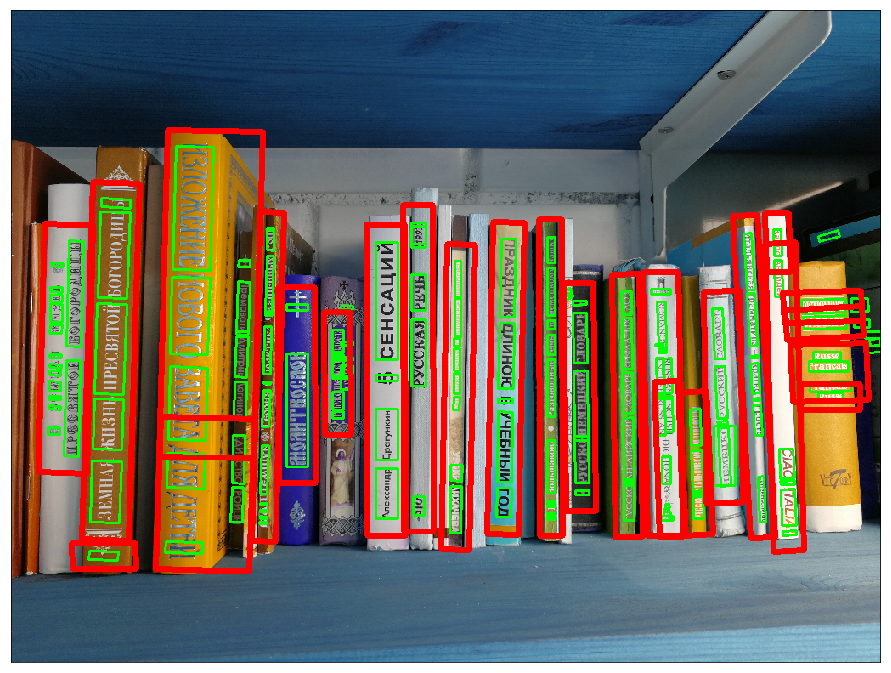

In [171]:
S_BLUR = 5
S_CANNY_TH1 = 10
S_CANNY_TH2 = 200

# Parameters to identify segment of lines after HoughLine search:
# Minimum DBSCAN_MIN_SAM points in the DBSCAN_EPS distance in the line of width S_WIDTH 
# to consider it part of the line segment
S_WIDTH = 3 #best
DBSCAN_EPS=11 # best
DBSCAN_MIN_SAM=20 # best
S_MINLEN = 25 # best
S_K_ANGLE = 0.02 * np.pi # best
S_HOUGH_TH=40

# Angle to filter horizontal and vertical lines on book blocks
B_ANGLE=0.01 * np.pi

# Angle to include text box into core boxes for single book
B_THETA=0.01 * np.pi

# Angle to not add blocks 
M_ANGLE=0.03 * np.pi

V_X_TH = 5
V_Y_GAP = 5
H_Y_TH = 10
H_X_GAP = 5

edges_glob = []

IMSIZE = 1024

IMAGEFILE = "shelves/6.jpg"
response = google_res[IMAGEFILE]

oimg = cv2.imread(IMAGEFILE)
img = oimg
if img.shape[1] != IMSIZE:
    ratio = IMSIZE/img.shape[1]
    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio)

boxes = []
segms = []
for p in response.full_text_annotation.pages:
    for b in p.blocks:
        for par in b.paragraphs:
            for w in par.words:
                v = w.bounding_box.vertices
                #v = par.bounding_box.vertices
                x1, y1 = int(v[0].x * ratio), int(v[0].y * ratio)
                x2, y2 = int(v[1].x * ratio), int(v[1].y * ratio)
                x3, y3 = int(v[2].x * ratio), int(v[2].y * ratio)
                x4, y4 = int(v[3].x * ratio), int(v[3].y * ratio)
                boxes.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
                segms.append(SegmToCartesian([(x1+x4)/2, (y1+y4)/2], [(x2+x3)/2, (y2+y3)/2], weight=10000))
                #segms.append(SegmToCartesian([x2, y2], [x3, y3]))
                #segms.append(SegmToCartesian([x3, y3], [x4, y4], weight=10000))
                #segms.append(SegmToCartesian([x4, y4], [x1, y1]))
        
boxes = np.array(boxes)
text_lines = np.array(segms)

keys = np.empty((boxes.shape[0], 6))
# Calculate keys: theta, coordinates of center and diagonal length
for i, b in enumerate(boxes):
    x1, y1 = b[0]
    x2, y2 = b[1] 
    x3, y3 = b[2] 
    x4, y4 = b[3] 
    if x2 == x1:
        theta = np.pi * 0.5
    else:
        theta = np.arctan((y1-y2)/(x1-x2))
        #print(theta)
    x, y = (x1 + x3)//2, (y1+y3)//2
    diag = np.sqrt((x1-x3)**2 + (y1-y3)**2)
    w = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    h = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    keys[i] = np.array([theta, x, y, w, h, diag])
    
sort_by_length = np.flip(np.argsort(keys[:, 5]))

max_book = np.amax(keys[:, 3]) * 4
max_book_width = np.amax(keys[:, 4]) * 3

books = np.empty((0, 4, 2), dtype=np.int32)
book_keys = np.empty((0, 6), dtype=np.float64)
is_segmented = np.zeros((boxes.shape[0]))

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(imgray, (S_BLUR, S_BLUR), 0)
edges = cv2.Canny(blurred, S_CANNY_TH1, S_CANNY_TH2)

# Blur hard areas with text to minimize noise
for b in boxes:
    cv2.drawContours(edges, [b], 0, 0, -1)

for i in sort_by_length[0:len(sort_by_length)//2]:
#for i in sort_by_length[0:1]:
    if is_segmented[i]:
        continue

    theta, x, y = keys[i, 0:3]
    book = RectFromKeys(theta, x, y, max_book, max_book_width)

    x, y, w, h = cv2.boundingRect(book)
    near_idxs = np.argwhere((keys[:, 1] > x) & (keys[:, 1] < x+w) & (keys[:, 2] > y) & (keys[:, 2] < y+h))
    # Only take boxes which are near and not segmented yet
    near_idxs = near_idxs[np.isin(near_idxs, np.argwhere(is_segmented), invert=True)]
    #print('Near boxes: ', len(near_idxs))
    book, segm_idxs, edges_glob = SegmentBook(edges, book, boxes, i, near_idxs, trace=False)
    is_segmented[segm_idxs] = True
    theta, x, y, w, h, diag = BoxKeys(book[0], adjust_theta=True)
    w, h = w + 40, h + 20
    book = RectFromKeys(theta, x, y, w, h)
    books = np.append(books, book, axis=0)
    book_keys = np.append(book_keys, [[theta, x, y, w, h, diag]], axis=0)
    
    # Fill identified book to simplify further analysis 
    cv2.drawContours(edges, book, 0, 255, 2)

# Rotate and cut each book
# Store books in the file
# OCR each book and store texts 
for b in books:
    text = RecognizeBook(oimg, np.int0(b / ratio), trace=False)
    print('--------------------------------------------------------------------\n', text)
   
    
timg = np.copy(img)
color = (0, 255, 0)
for b in boxes:
    cv2.drawContours(timg, [b], 0, color, 2)
    
color = (255, 0, 0)
#for b in big_books[83:84]: # Horizontal on I11
for b in books:
    cv2.drawContours(timg, [b], 0, (255, 0, 0), 5)
    
plot_img(timg, show=True)

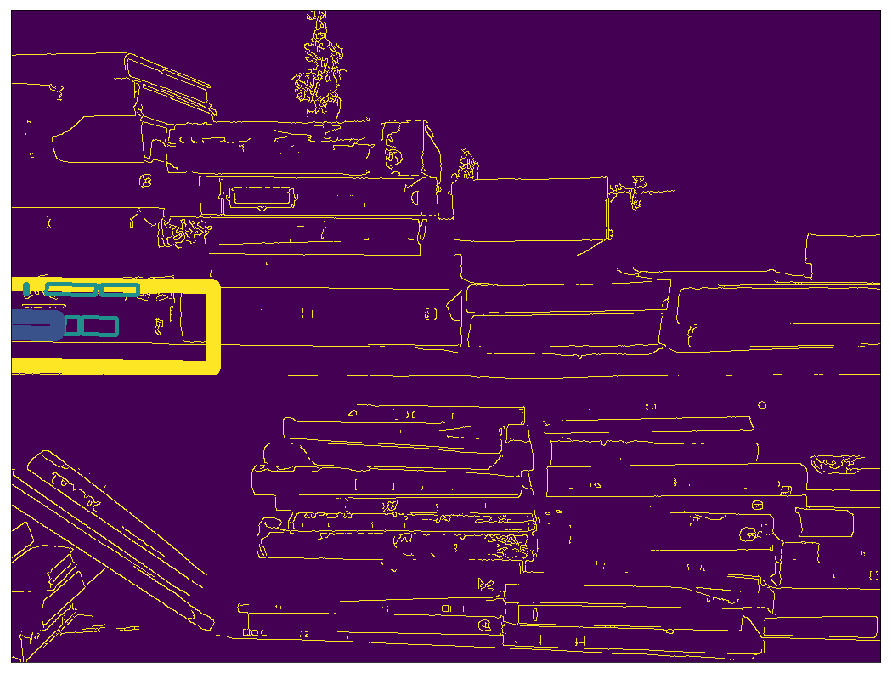

Image before rotation:  (103, 239)
Bounding rectangle:  0 320 239 103
Rotation centre:  119 51
Image after rotation:  (240, 106)
Image cropped: (240, 98)
Core boxes found:  3
[[[  1.57  48.00  25.00  59.00  19.03  62.94]]

 [[  1.57  49.00  72.00  17.00  20.02  26.91]]

 [[  1.57  49.00 104.00  41.00  20.02  46.52]]]


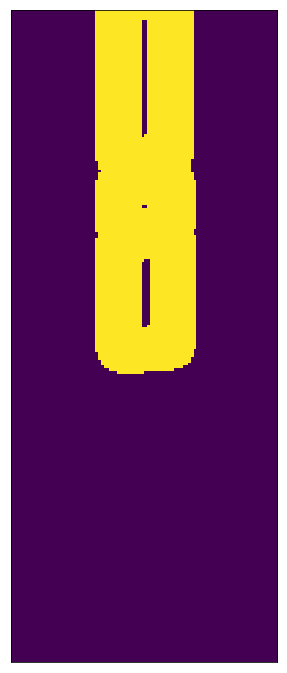

Total boxes:  6
Core boxes:  3 [[3]
 [4]
 [5]]
Other boxes:  3 [0 1 2]


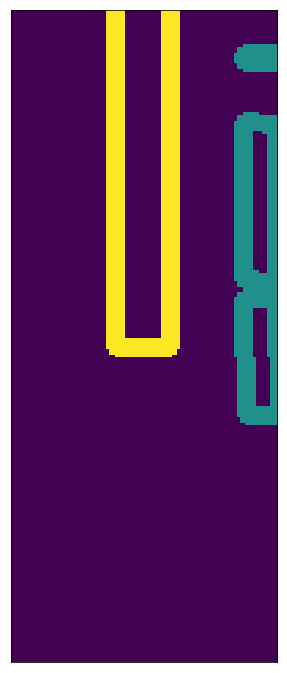

Vertical lines:  27


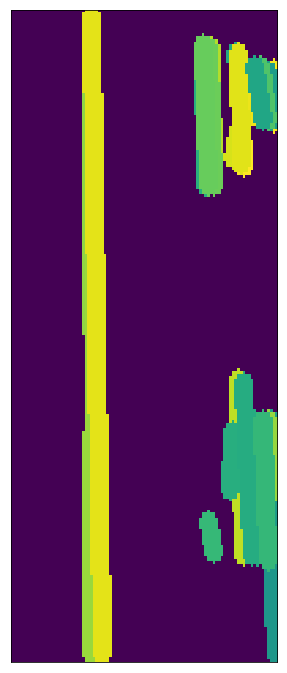

Cluster V-lines: [-1  0  1  2  3  4]


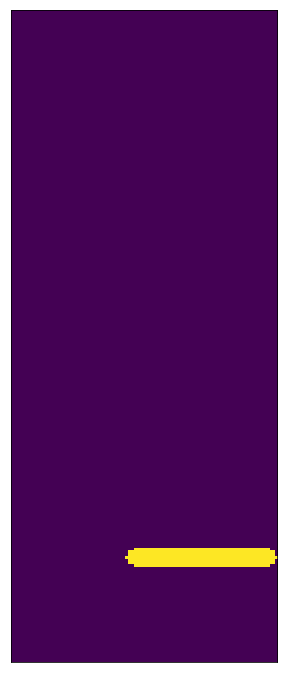

H-lines count:  2
[[[ 48 201]
  [ 94 201]]

 [[ 45 201]
  [ 94 201]]]
Cluster H-lines: [0]


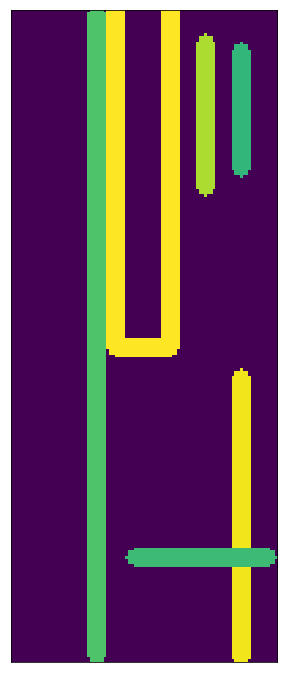

Core indexes:  [[3]
 [4]
 [5]]


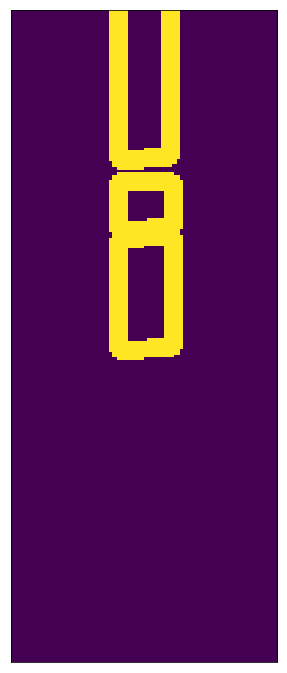

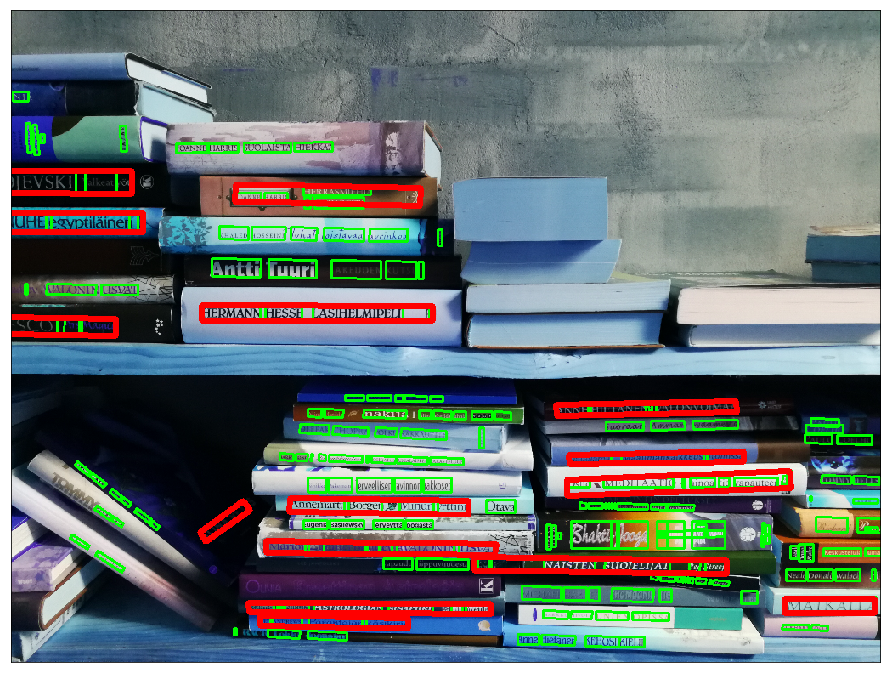

In [130]:
is_segmented = np.copy(t_is_segmented)
books = np.copy(t_books)
book_keys = np.copy(t_book_keys)

edges = cv2.Canny(blurred, S_CANNY_TH1, S_CANNY_TH2)
# Blur hard areas with text to minimize noise
for b in boxes:
    cv2.drawContours(edges, [b], 0, 0, -1)

#for i in sort_by_length[47:48]: # book with lot of perpendiculars
for i in sort_by_length[16:17]:
    if is_segmented[i]:
        continue
    theta, x, y = keys[i, 0:3]
    #print(dx1, dx2, dy1, dy2)
    #print(x, y)
    dx1 = (max_book*np.cos(theta) + max_book_width*np.sin(theta))//2
    dx2 = (-max_book*np.cos(theta) + max_book_width*np.sin(theta))//2
    dy1 = (max_book*np.sin(theta) - max_book_width*np.cos(theta))//2
    dy2 = (max_book*np.sin(theta) + max_book_width*np.cos(theta))//2
    book = np.int32(np.array([[[x-dx1, y-dy1], [x+dx2, y-dy2], [x+dx1, y+dy1], [x-dx2, y+dy2]]]))
    #if len(book_keys) > 4:
    #    dist = np.sqrt(np.sum((book_keys[:, 1:3].reshape((-1, 2)) - (x, y))**2, axis=1))
    #    #print('Distance to books: ', dist.shape)
    #    nearest_books_idx = np.argsort(dist)
    #    nearest_books = books[nearest_books_idx[0:4]]
    #    book = CutBook(book, nearest_books, trace=True)
                
    x, y, w, h = cv2.boundingRect(book)
    near_idxs = np.argwhere((keys[:, 1] > x) & (keys[:, 1] < x+w) & (keys[:, 2] > y) & (keys[:, 2] < y+h))
    # Only take boxes which are near and not segmented yet
    near_idxs = near_idxs[np.isin(near_idxs, np.argwhere(is_segmented), invert=True)]
    #print('Near boxes: ', len(near_idxs))
    book, segm_idxs, edges_glob = SegmentBook(edges, book, boxes, i, near_idxs, trace=True)
    is_segmented[segm_idxs] = True
    books = np.append(books, book, axis=0)
    book_keys = np.append(book_keys, np.expand_dims(BoxKeys(book[0], adjust_theta=True), axis=0), axis=0)
    
    #timg = np.copy(img)
    #cv2.drawContours(timg, boxes[segm_idxs], -1, (255, 0, 0), 5)
    #plot_img(timg, show=True)
    
    # Fill identified book to simplify further analysis 
    cv2.drawContours(edges, book, 0, 255, 2)


timg = np.copy(img)
color = (0, 255, 0)
for b in boxes:
    cv2.drawContours(timg, [b], 0, color, 2)
    
color = (255, 0, 0)
#for b in big_books[83:84]: # Horizontal on I11
for b in books:
    cv2.drawContours(timg, [b], 0, (255, 0, 0), 5)
    
plot_img(timg, show=True)


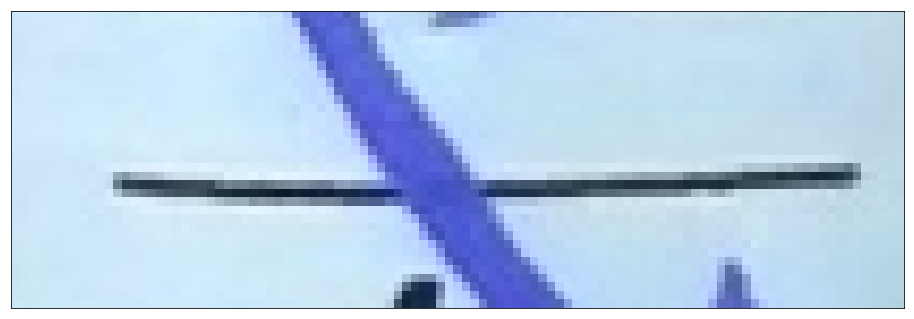

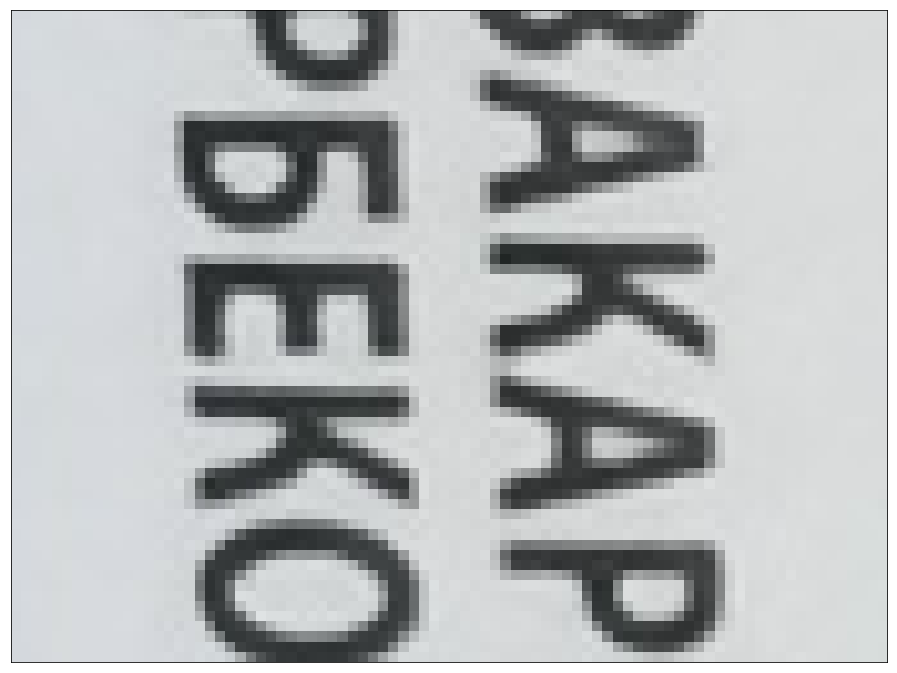

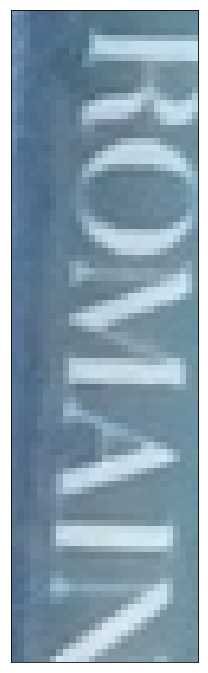

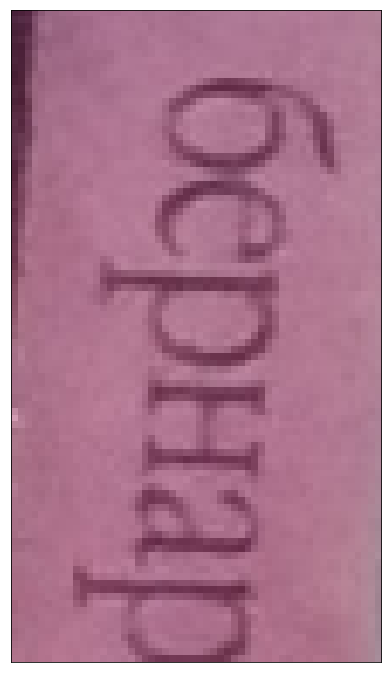

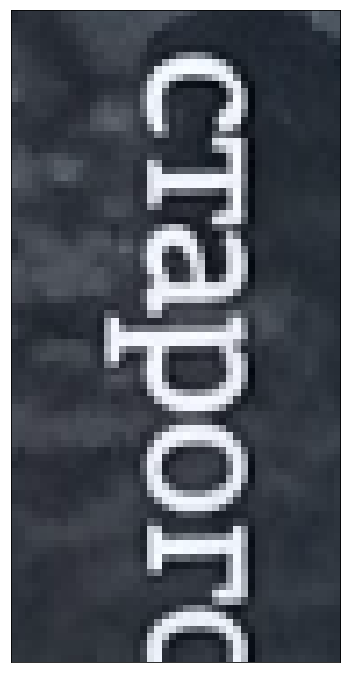

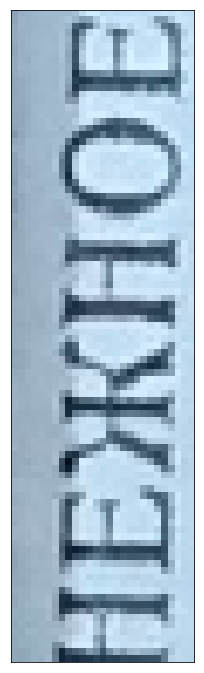

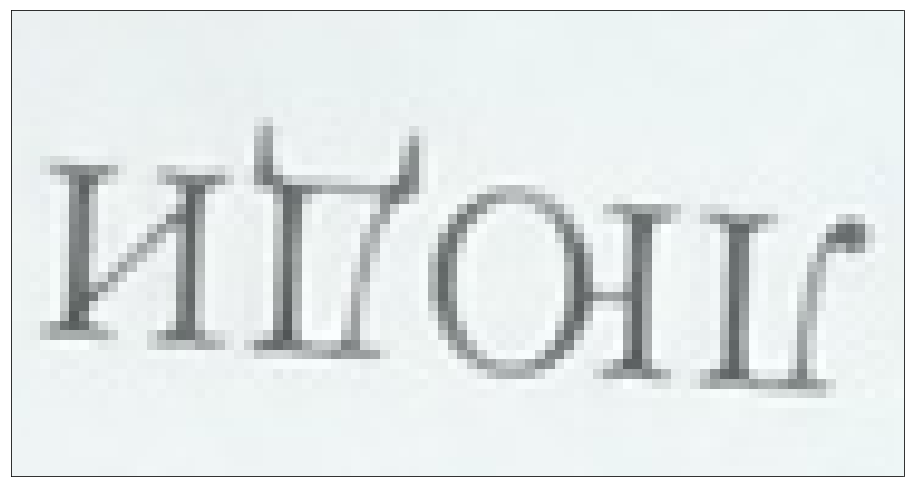

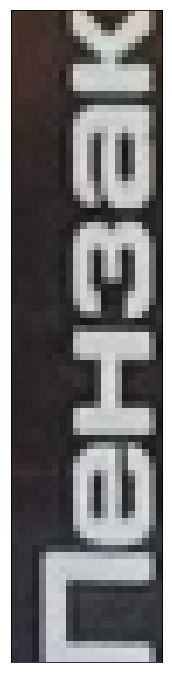

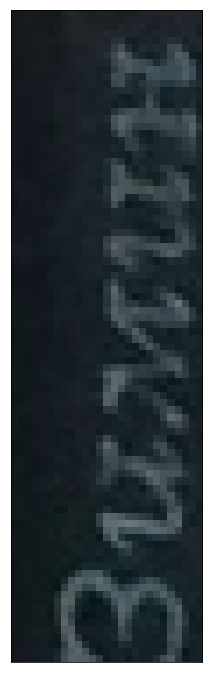

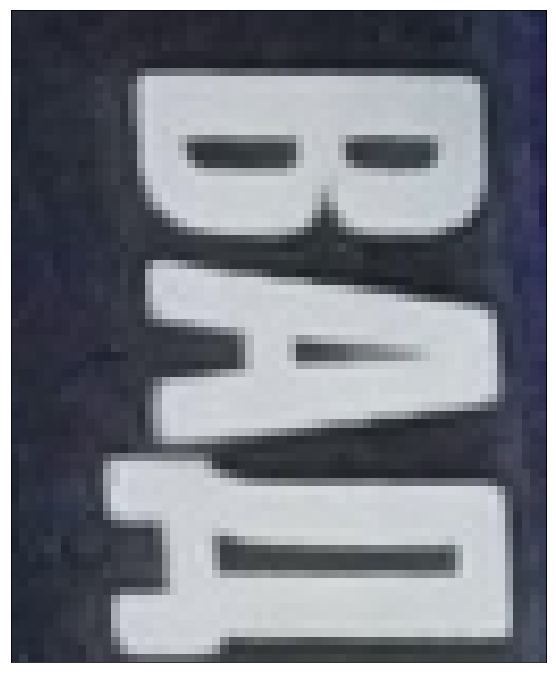

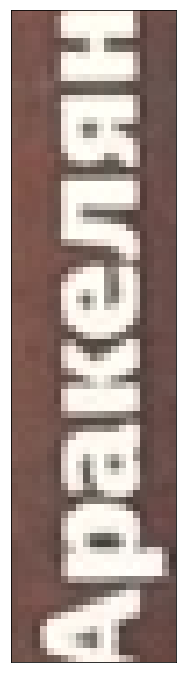

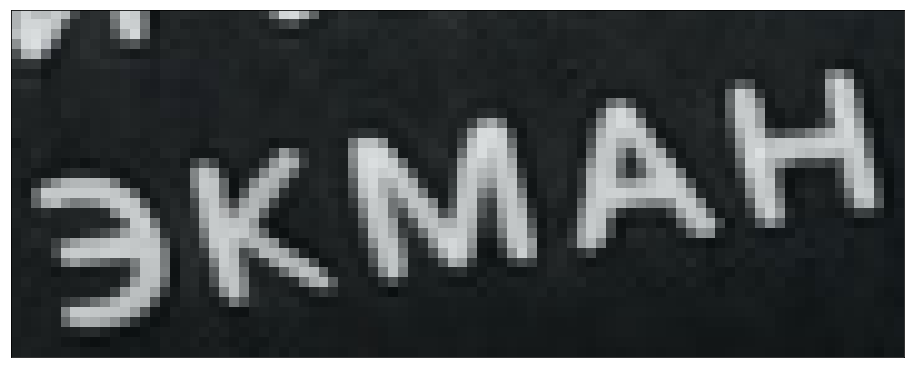

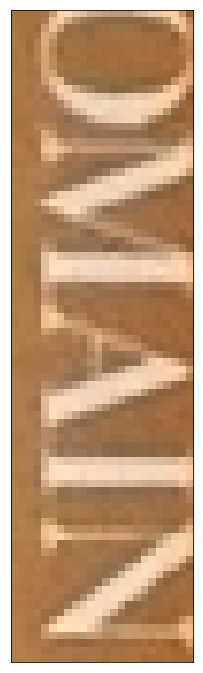

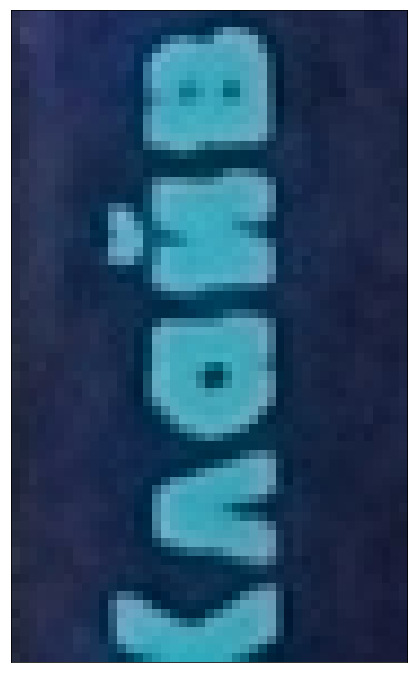

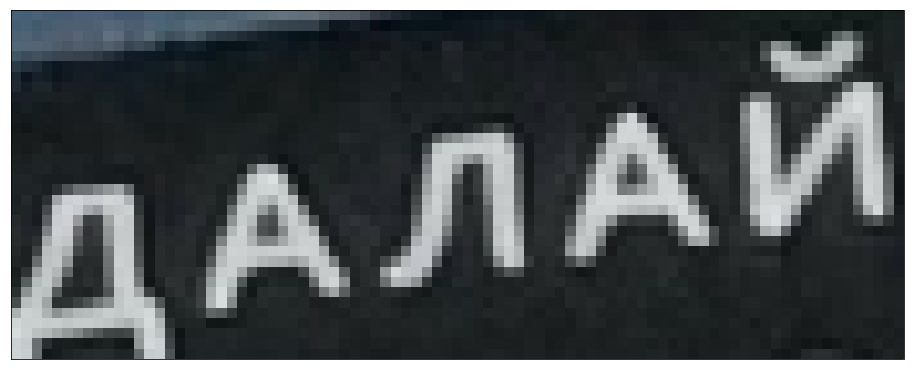

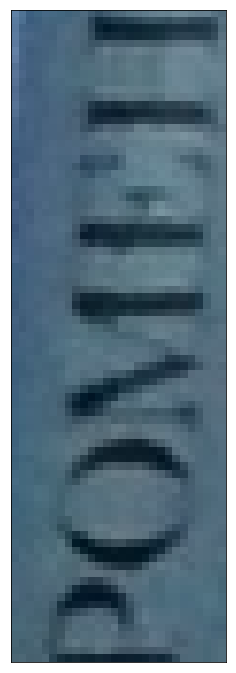

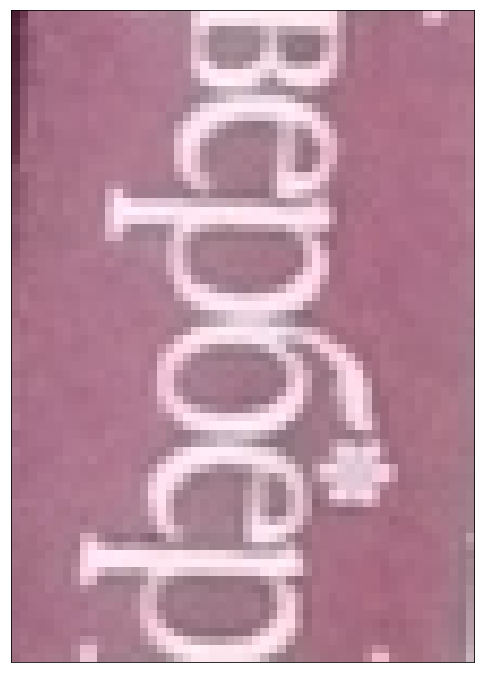

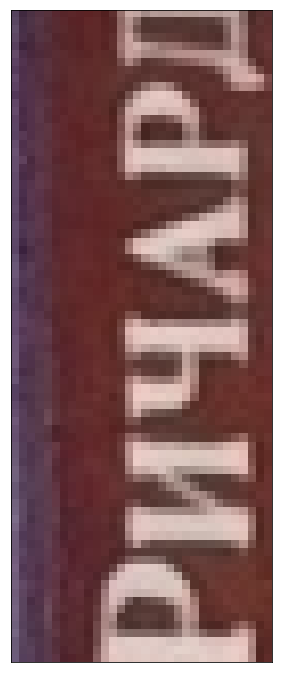

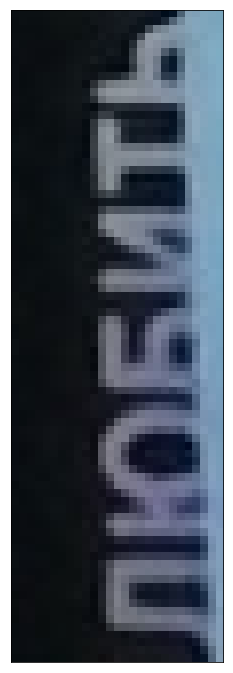

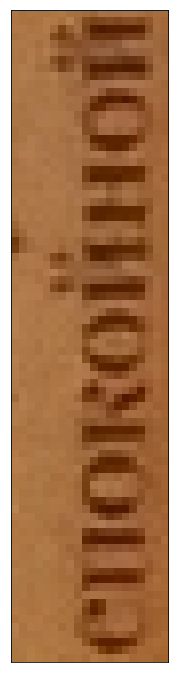

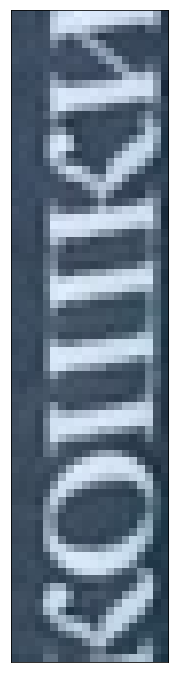

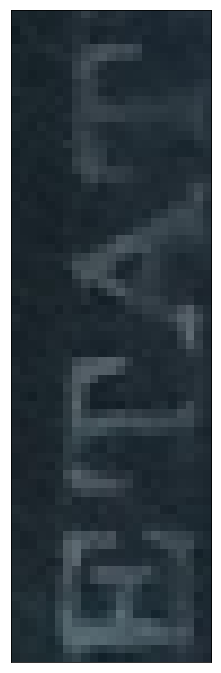

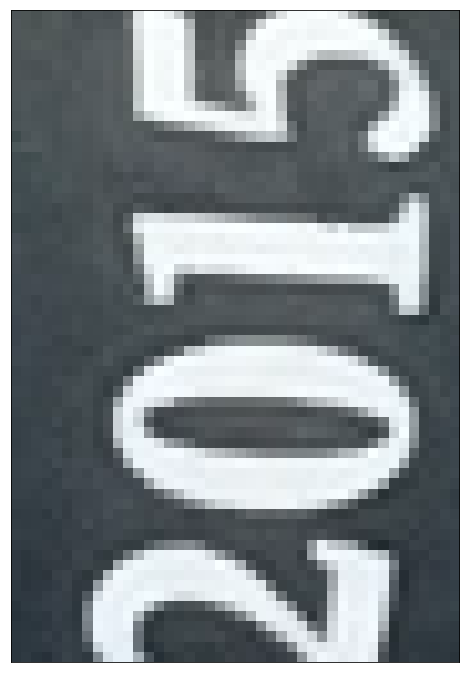

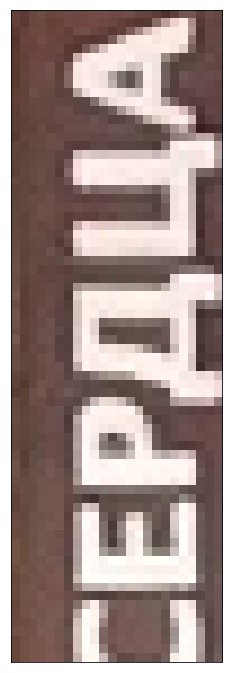

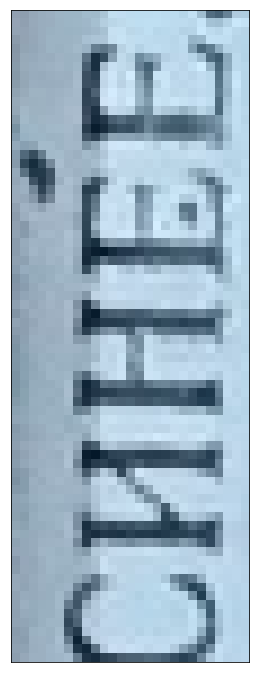

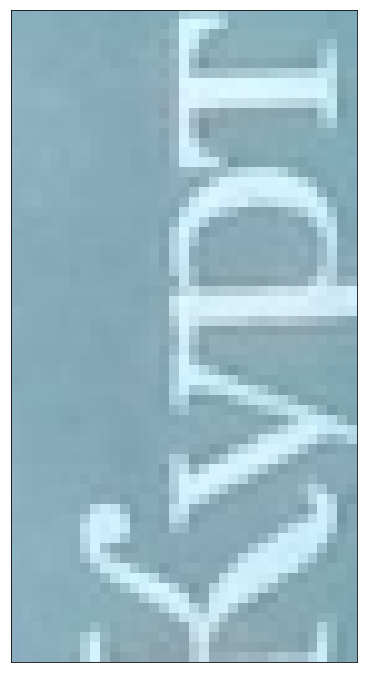

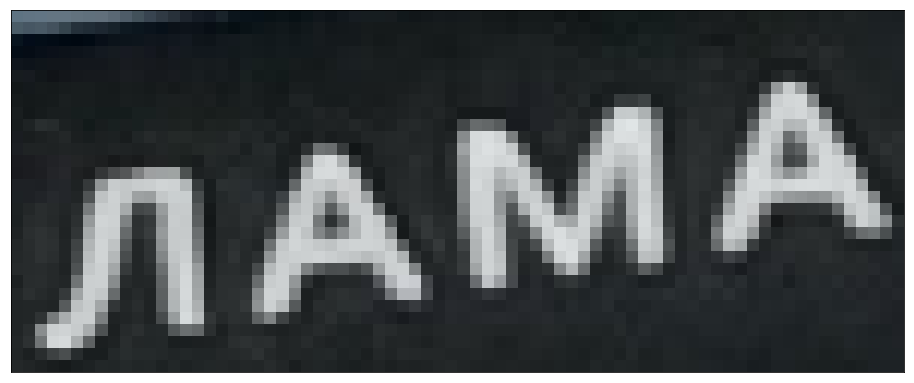

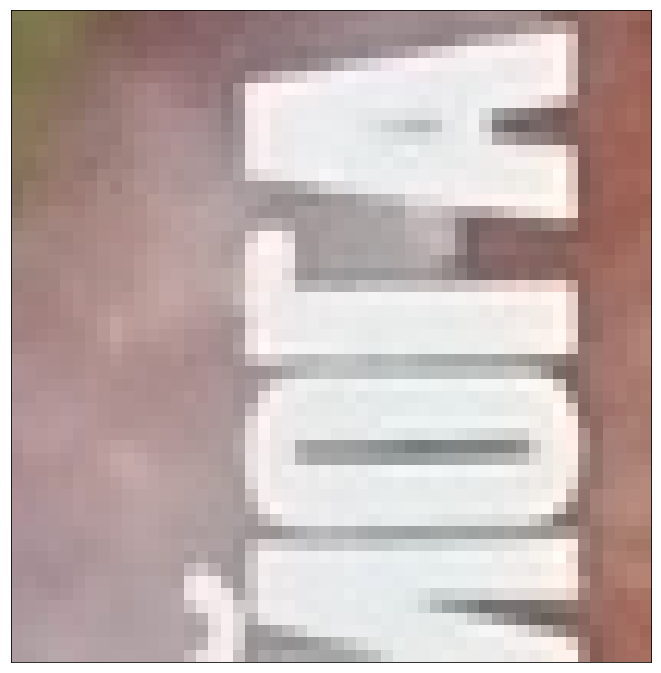

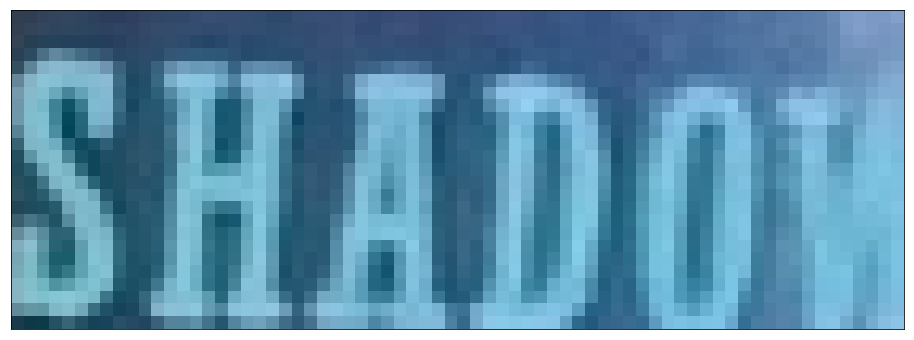

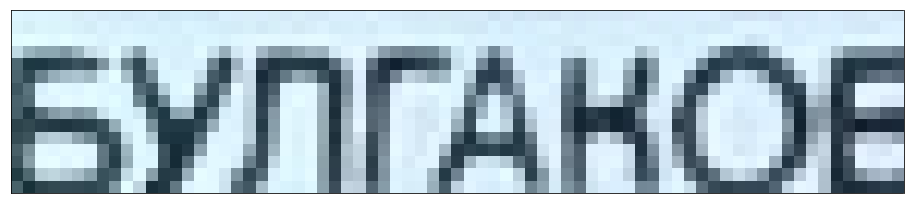

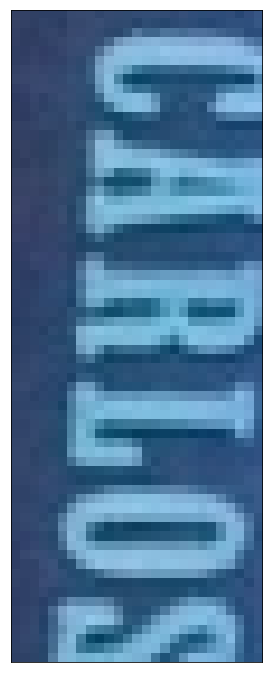

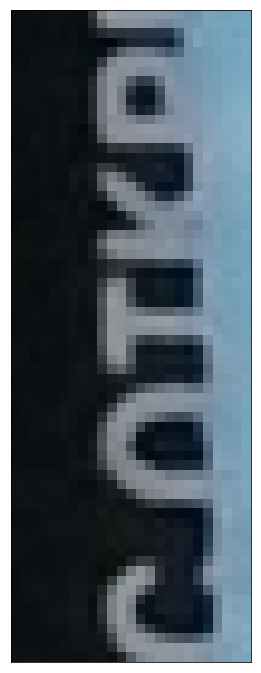

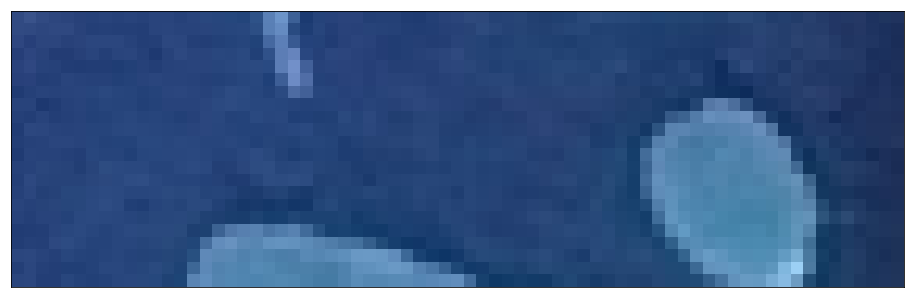

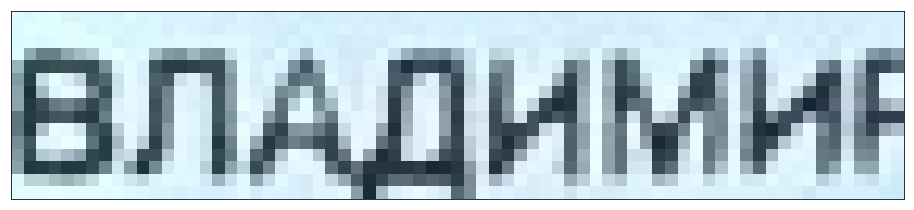

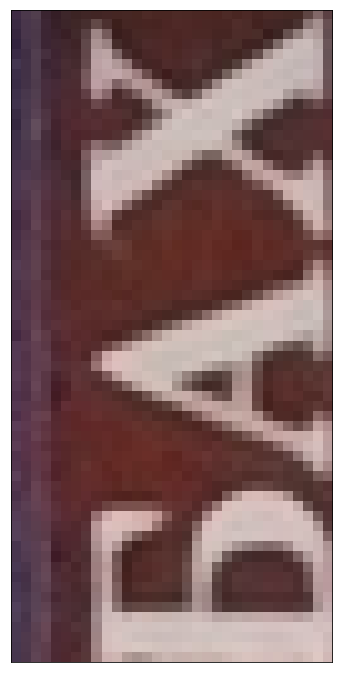

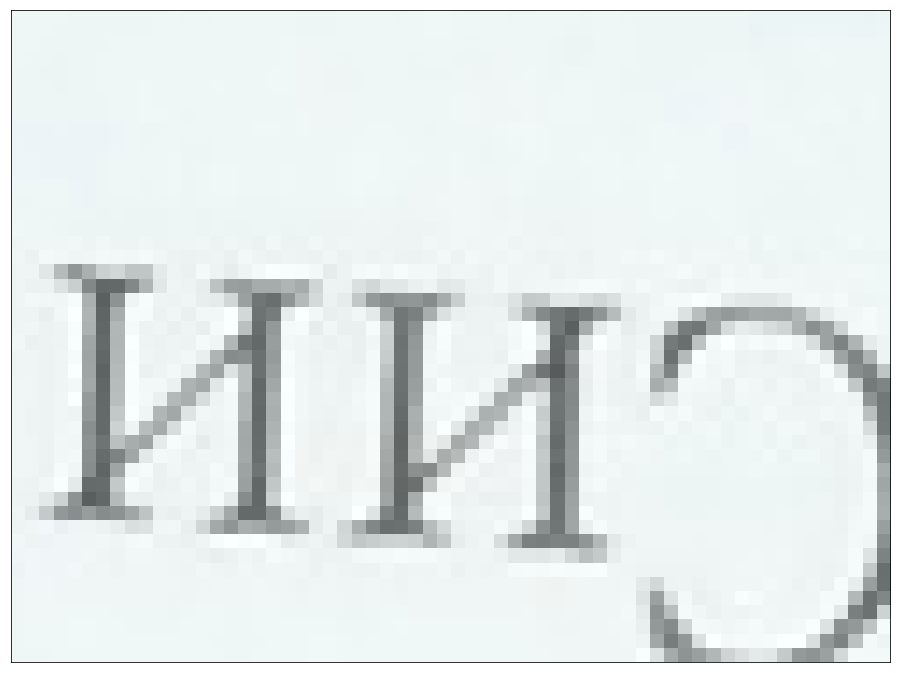

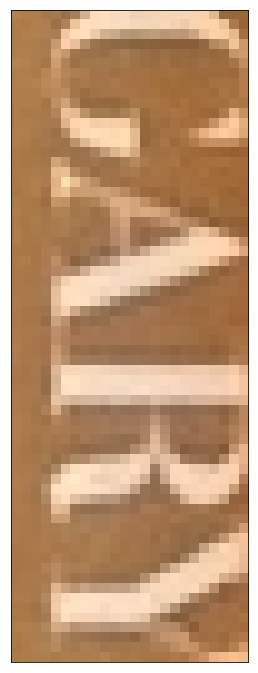

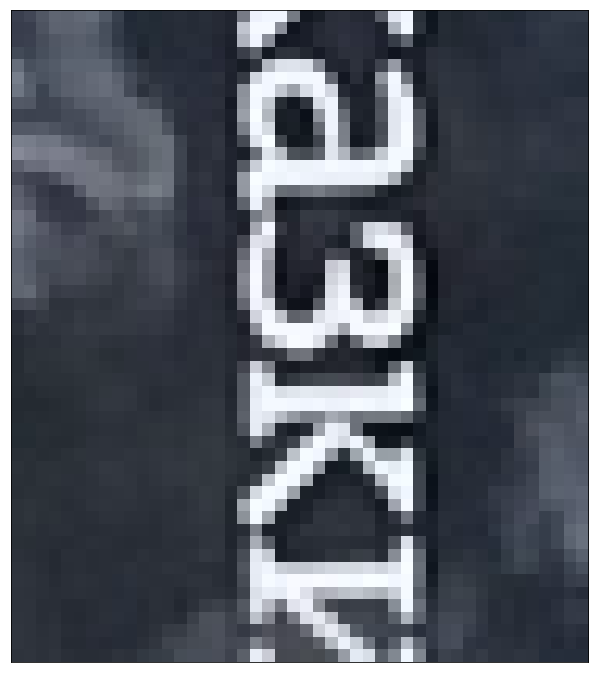

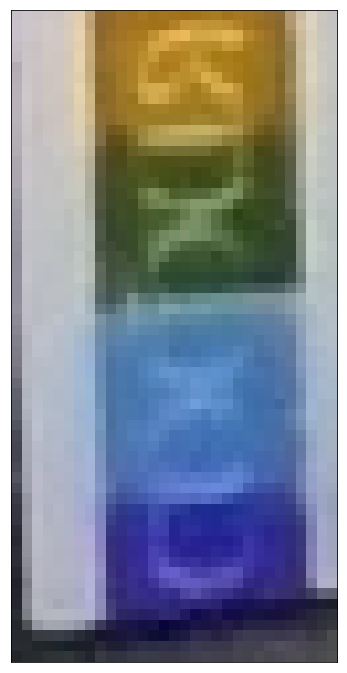

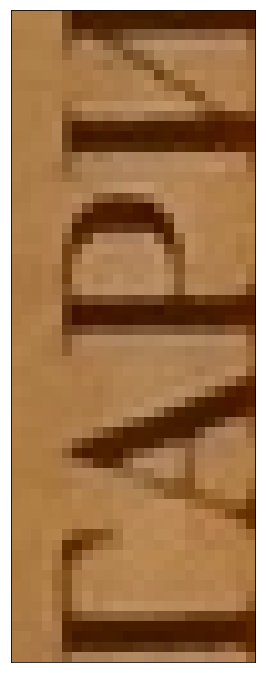

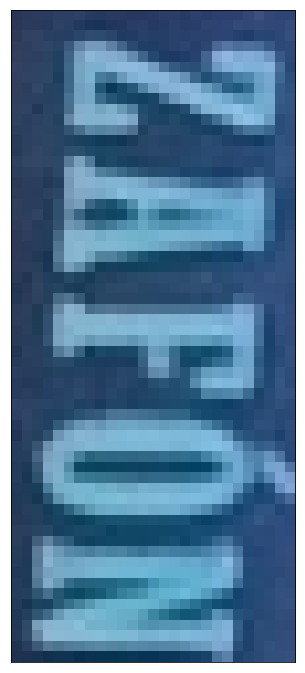

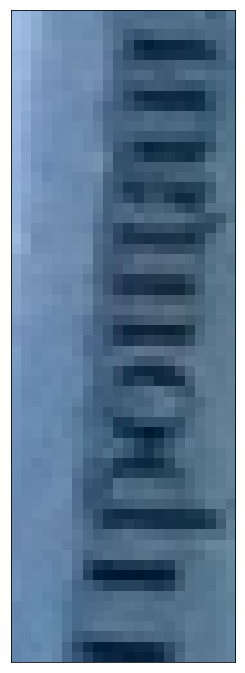

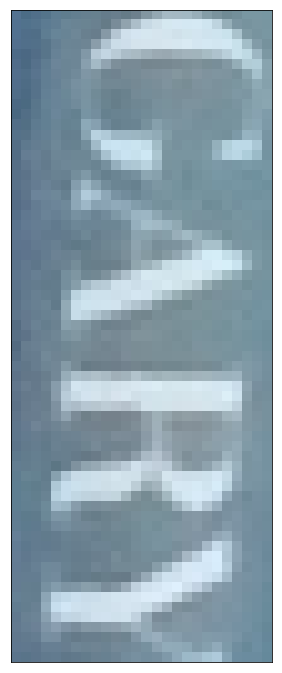

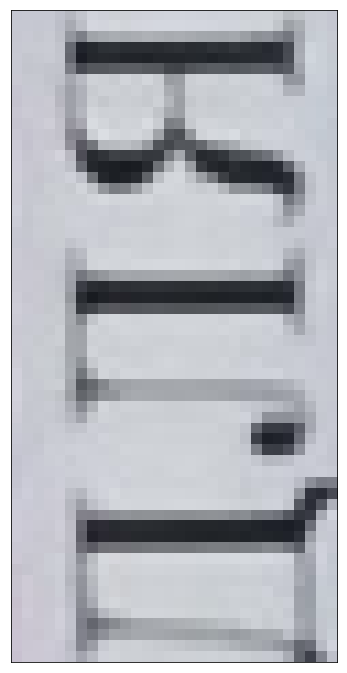

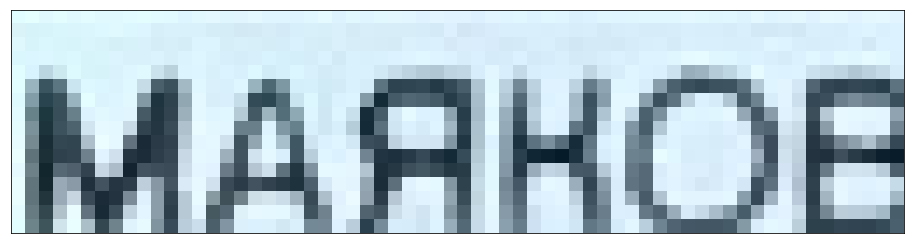

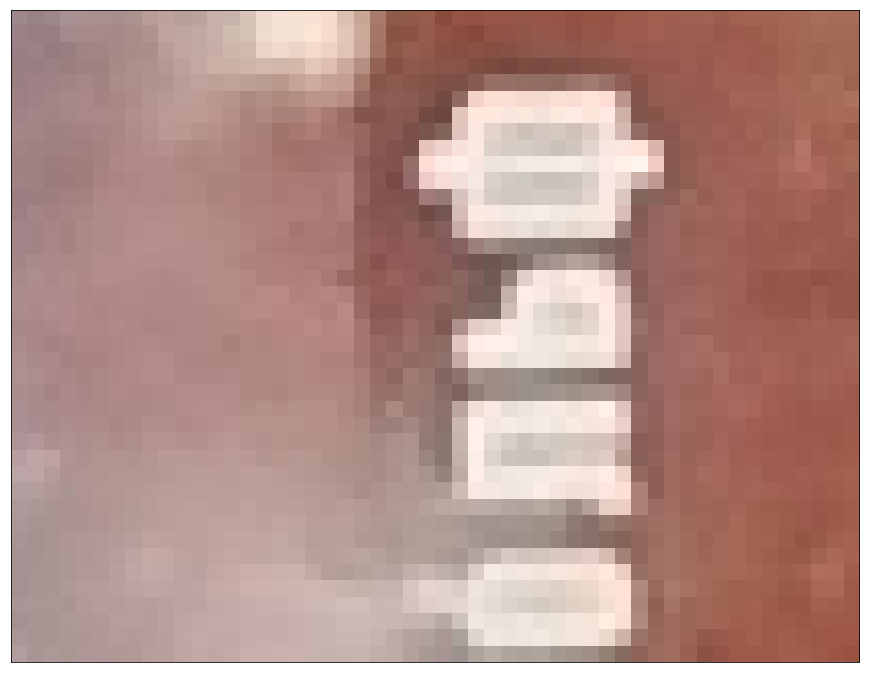

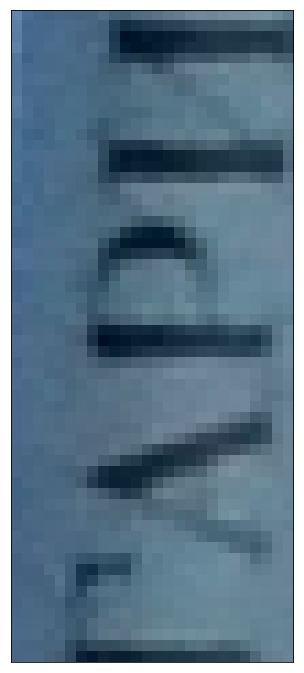

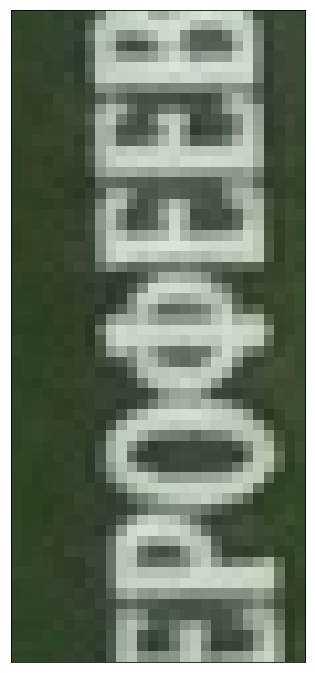

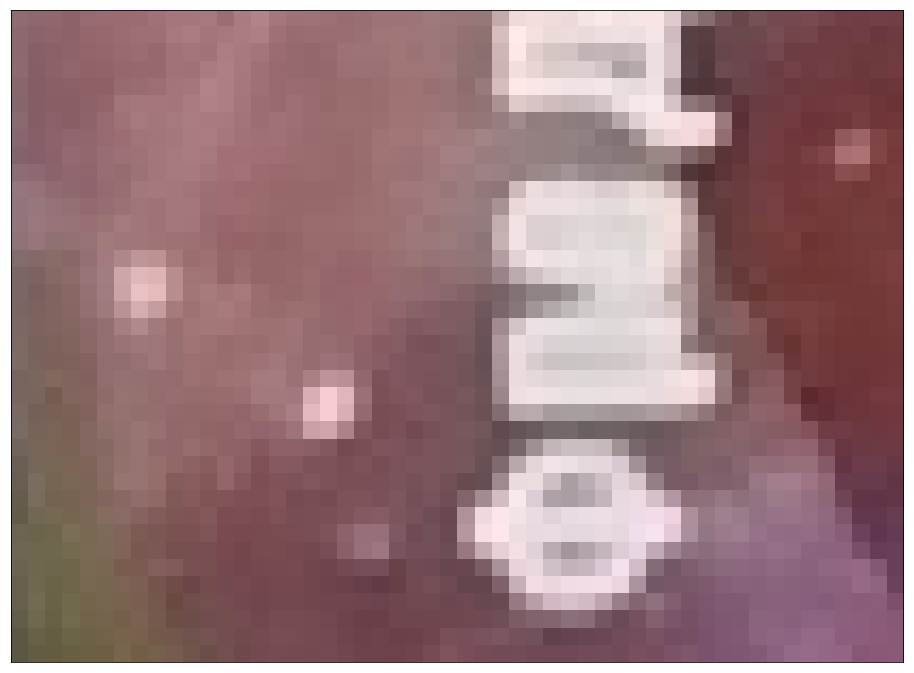

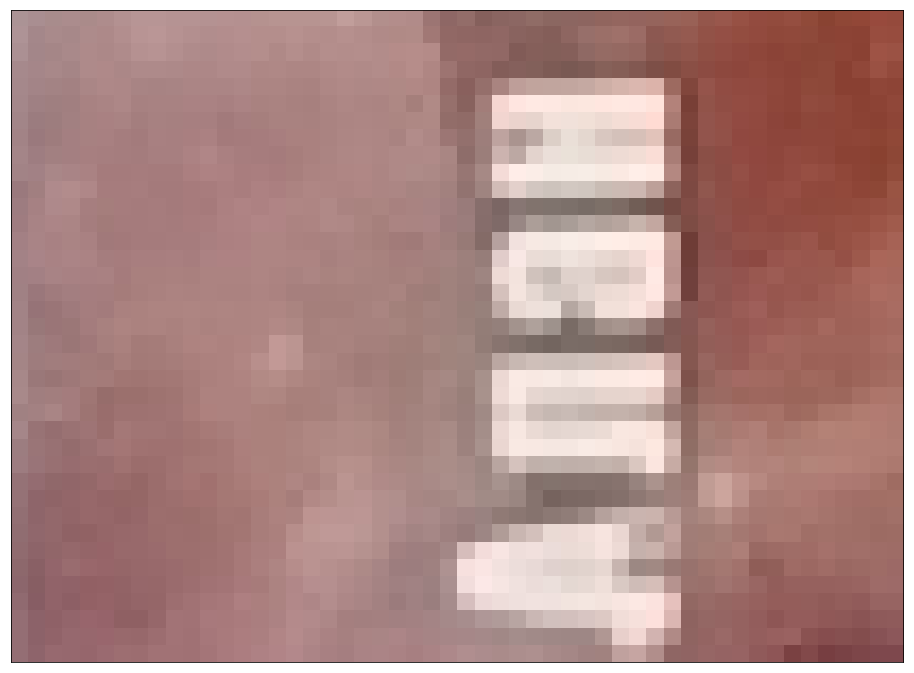

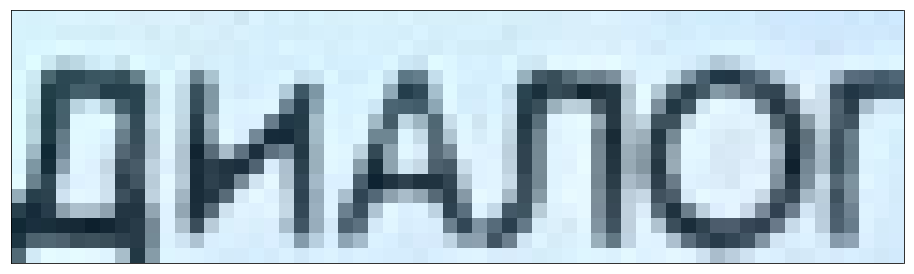

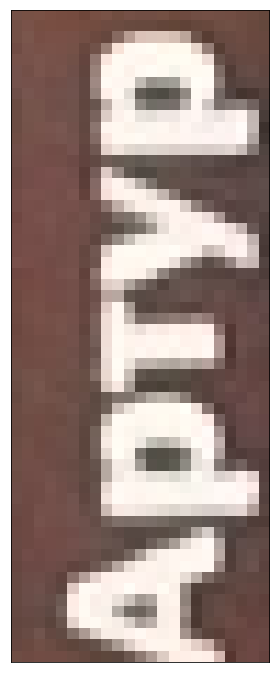

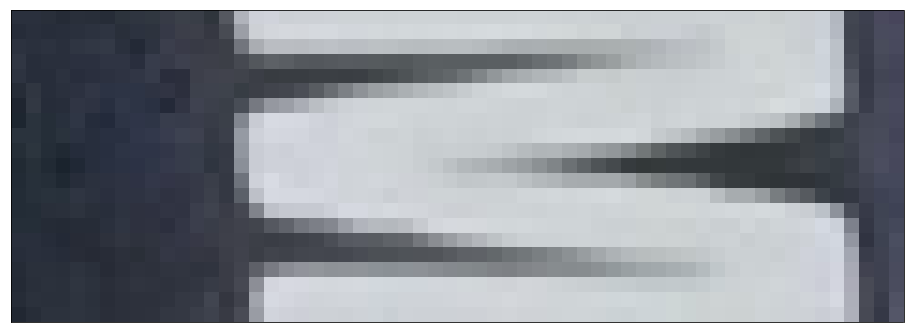

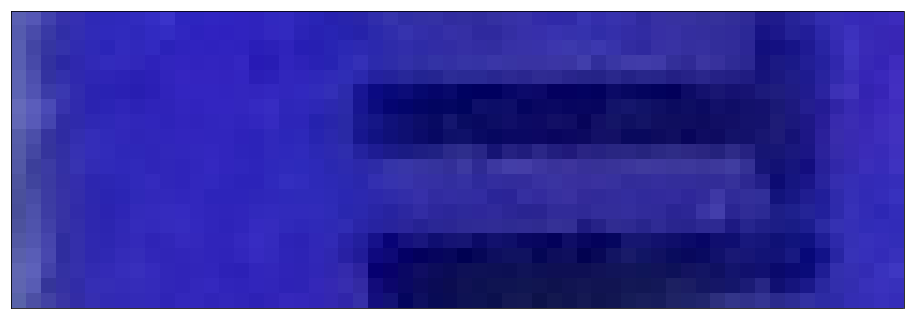

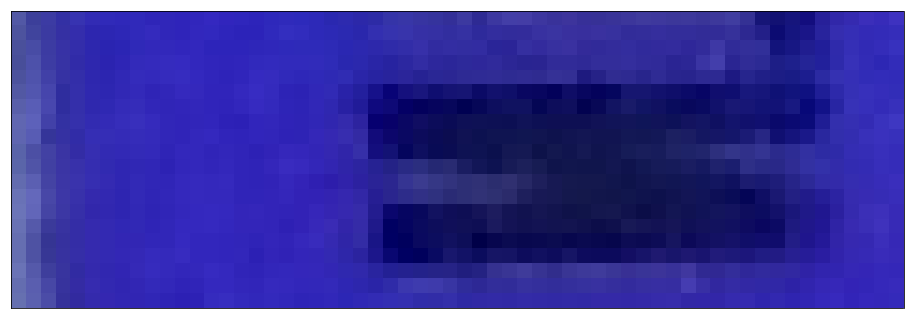

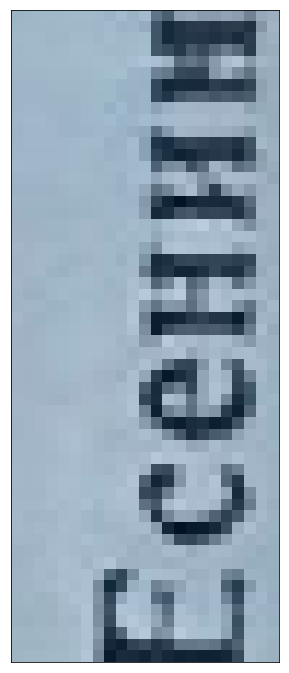

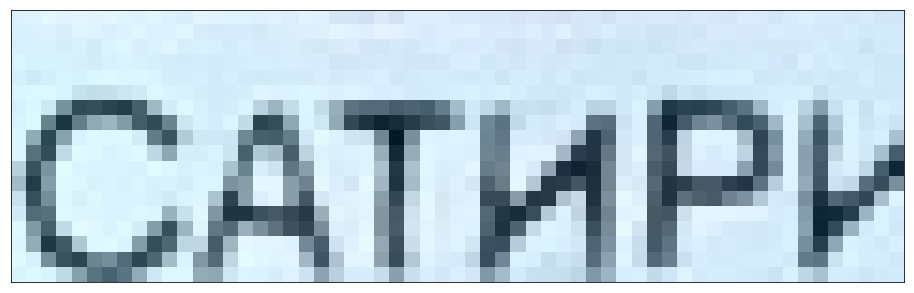

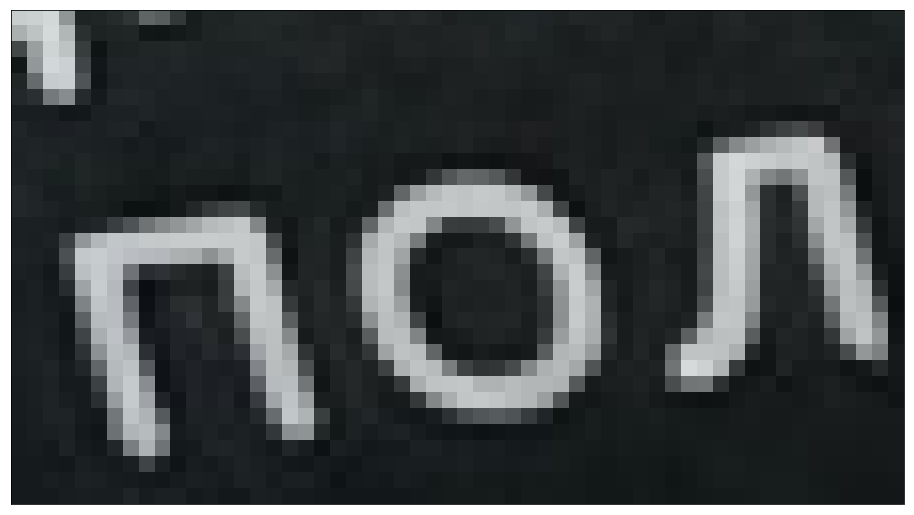

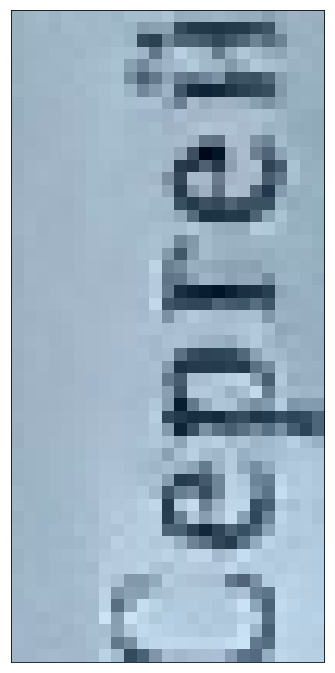

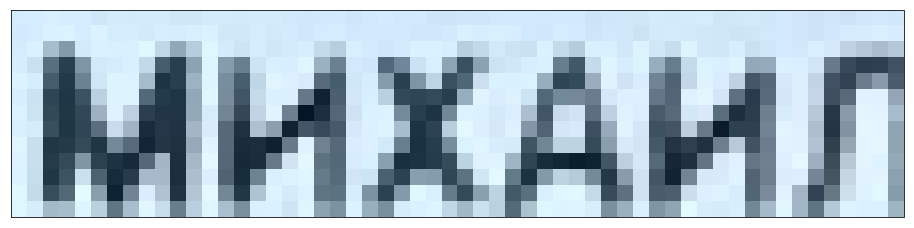

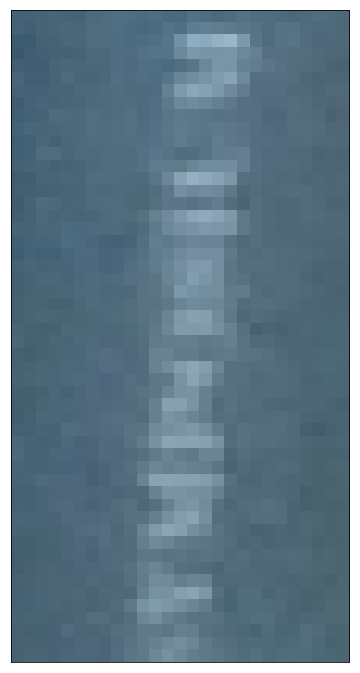

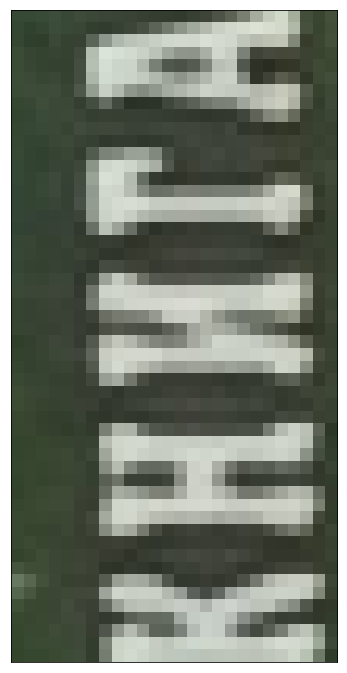

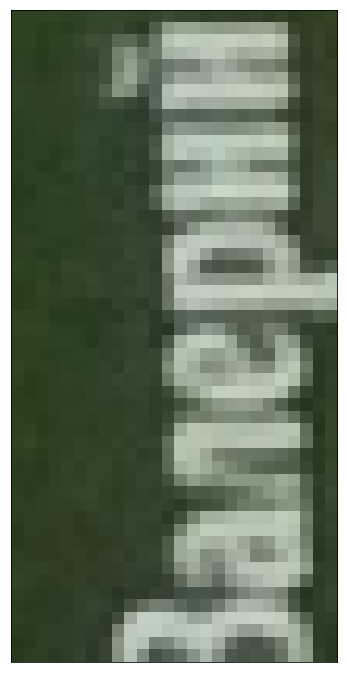

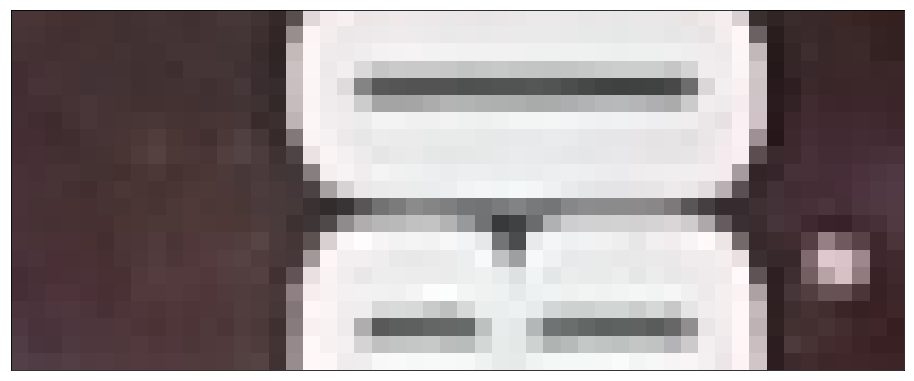

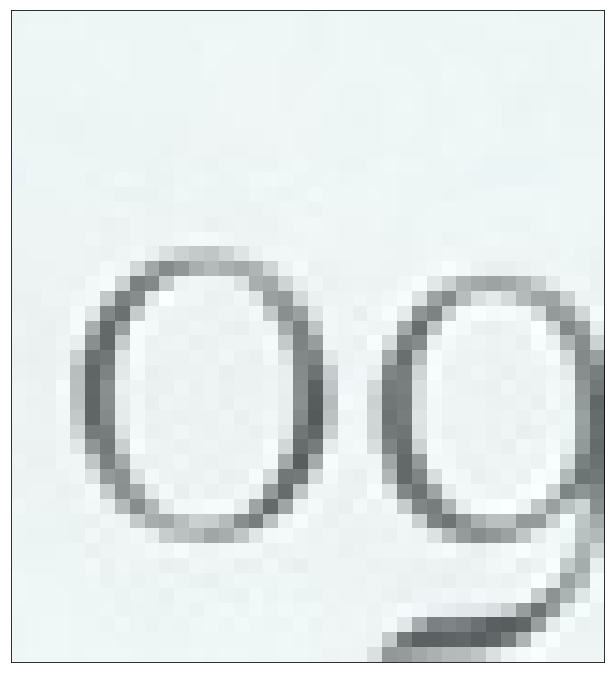

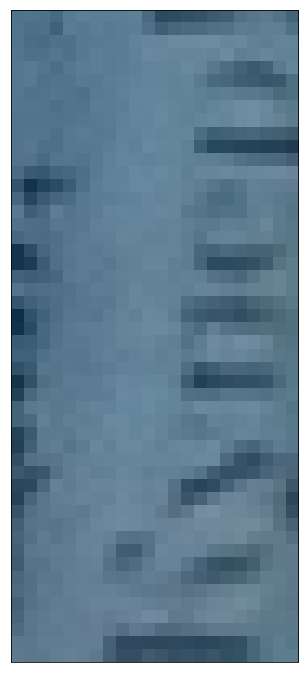

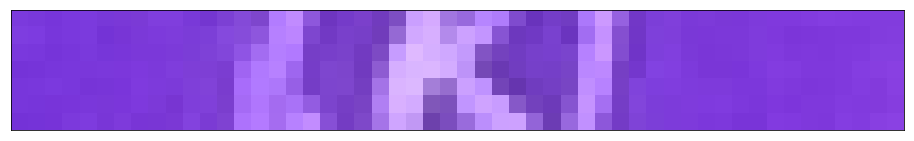

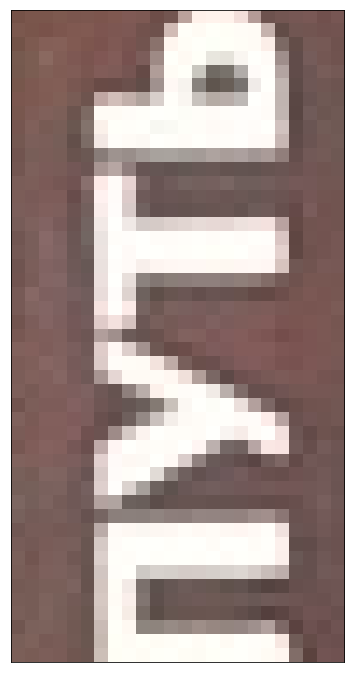

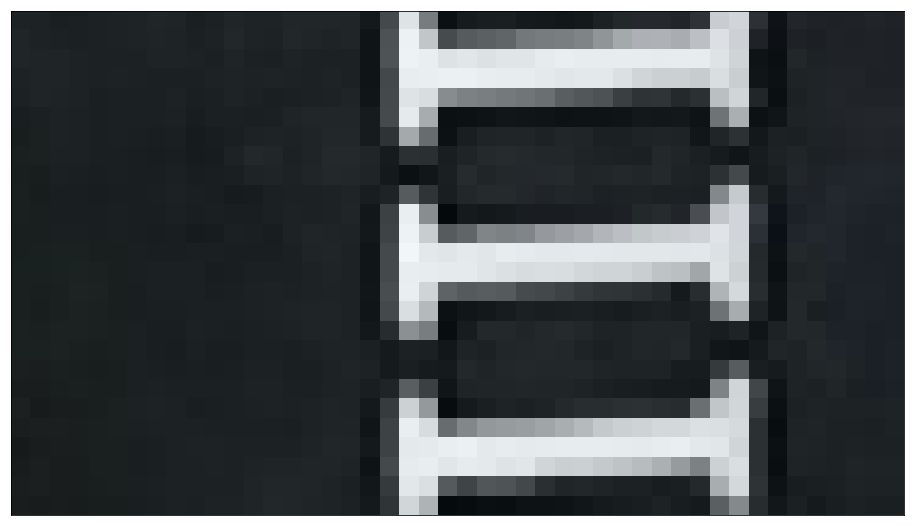

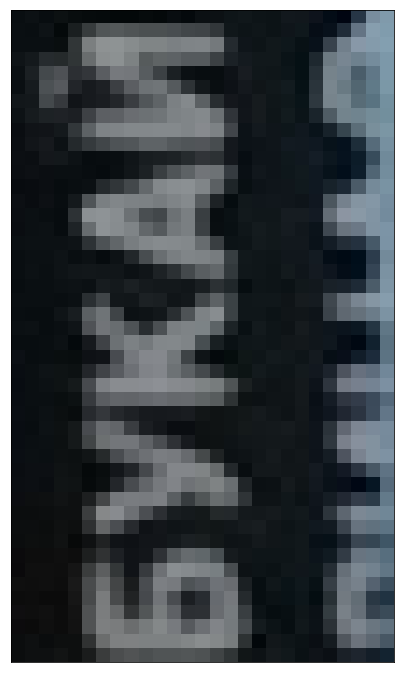

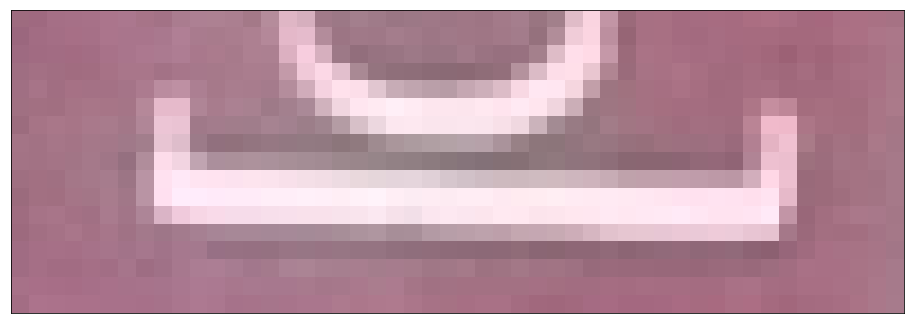

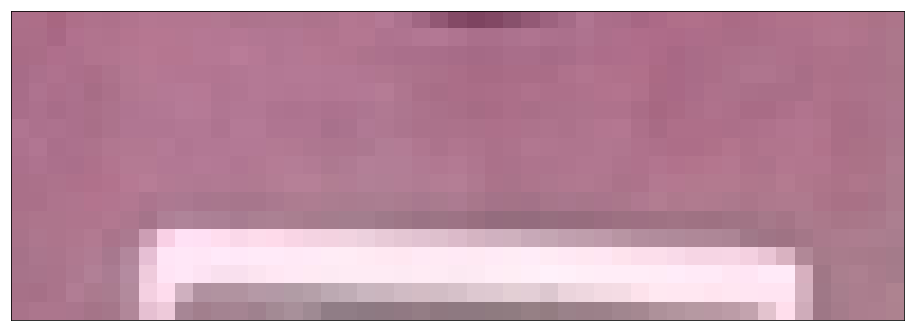

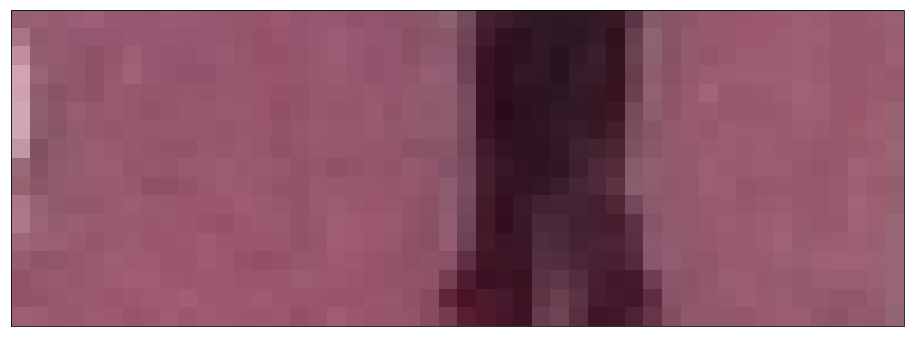

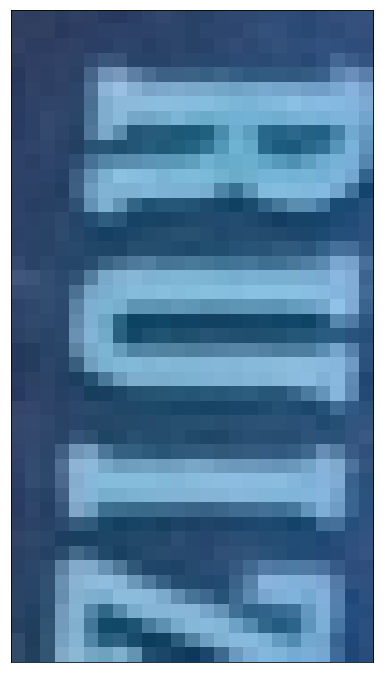

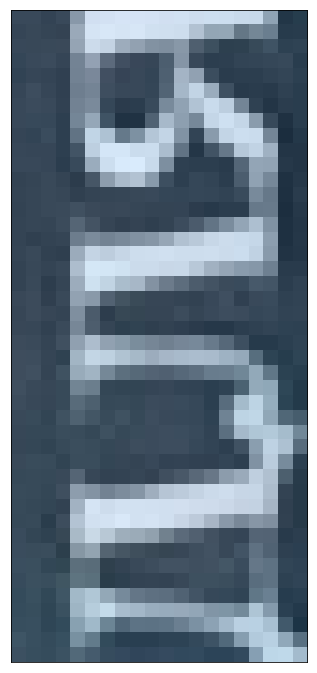

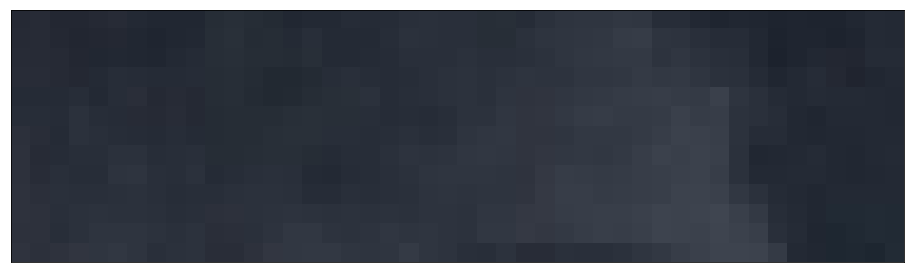

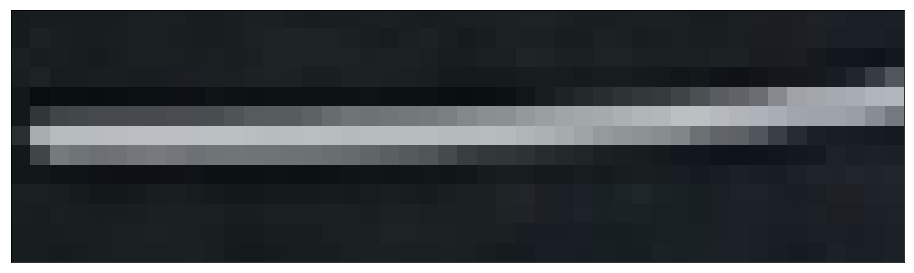

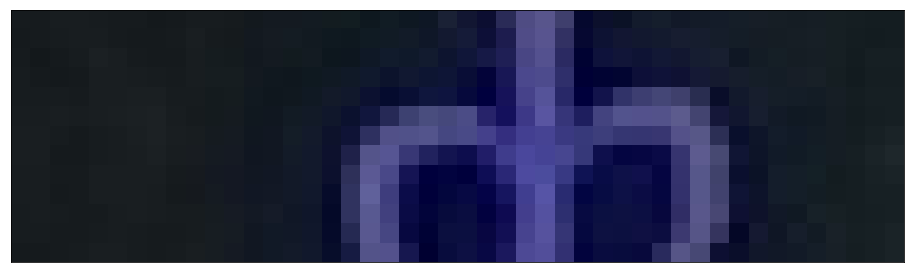

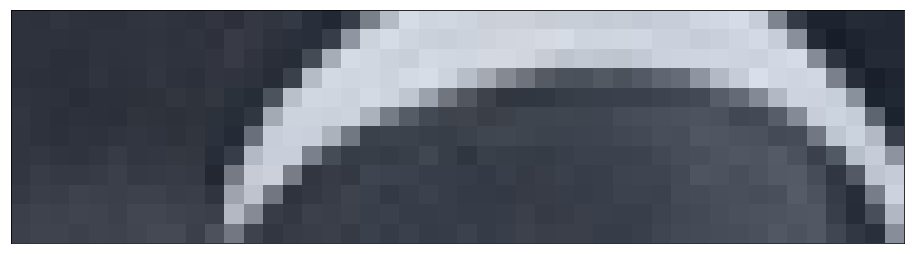

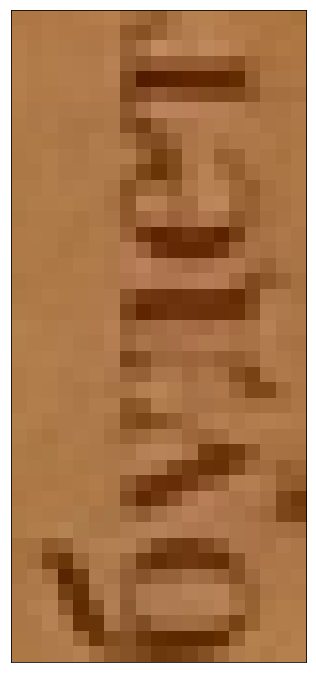

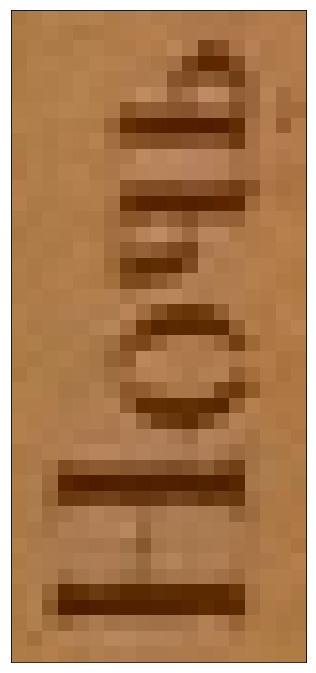

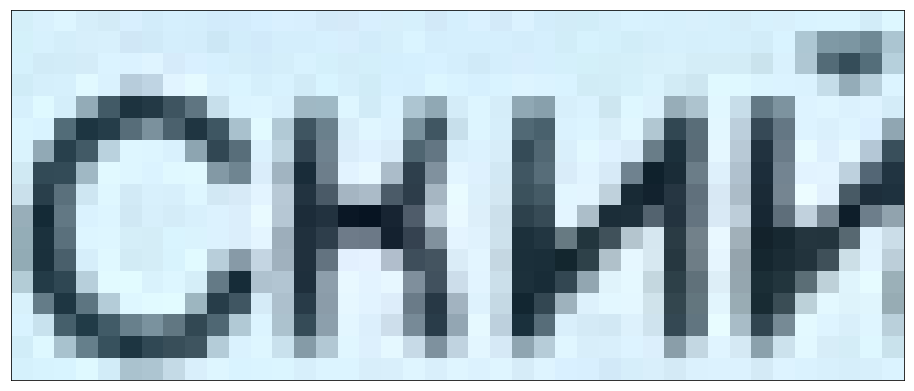

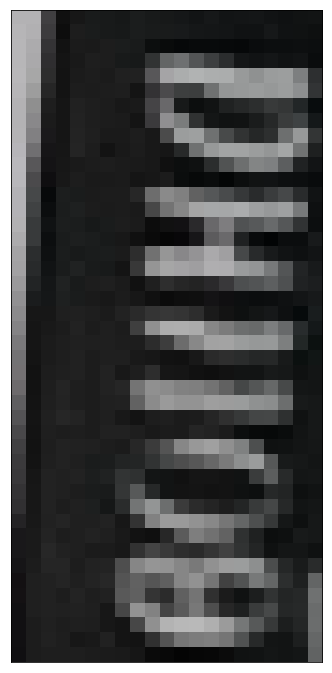

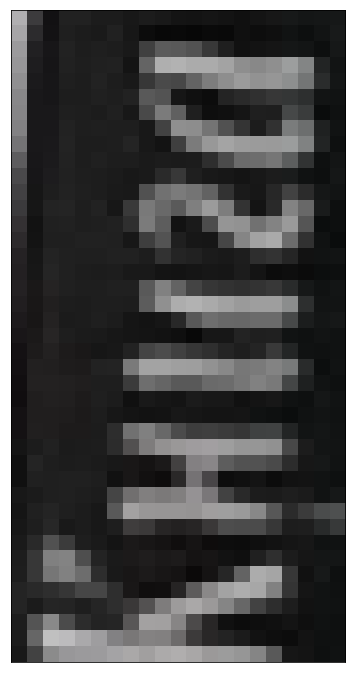

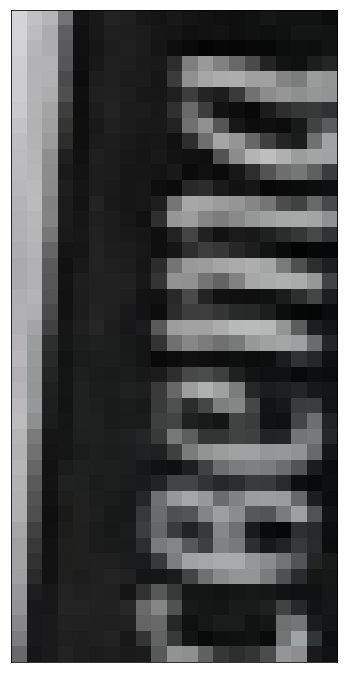

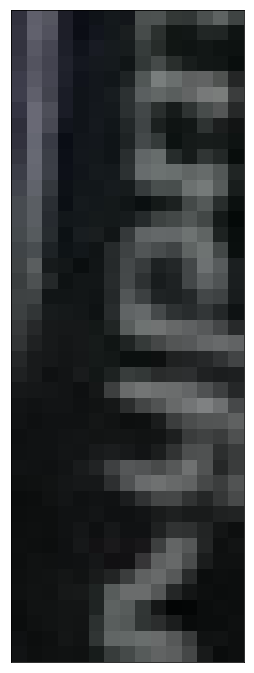

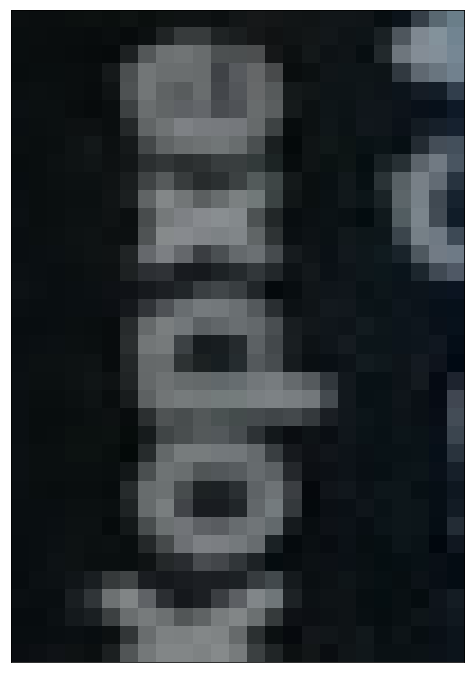

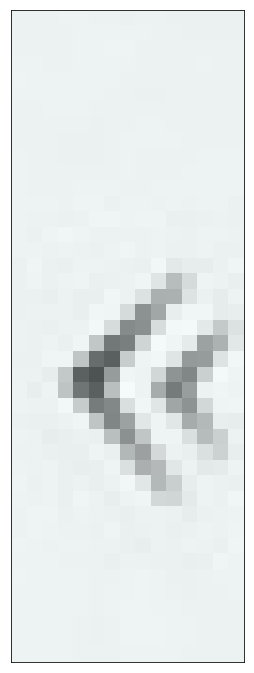

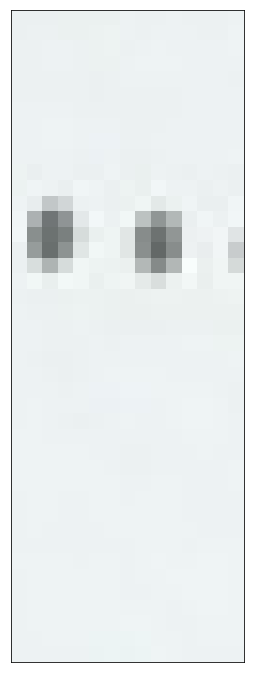

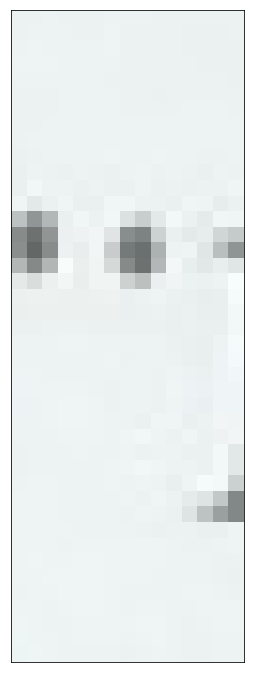

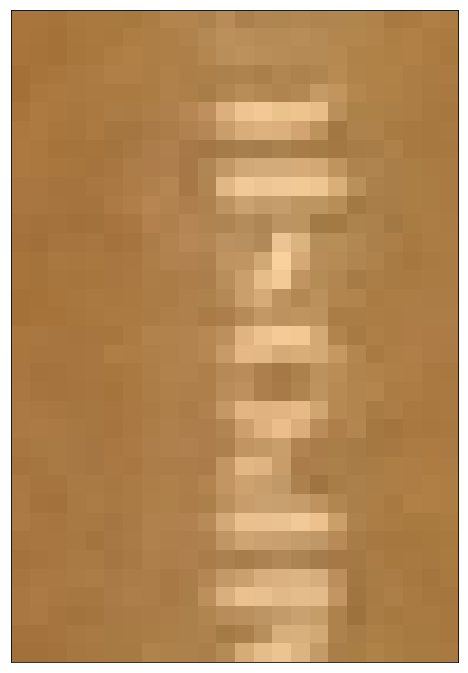

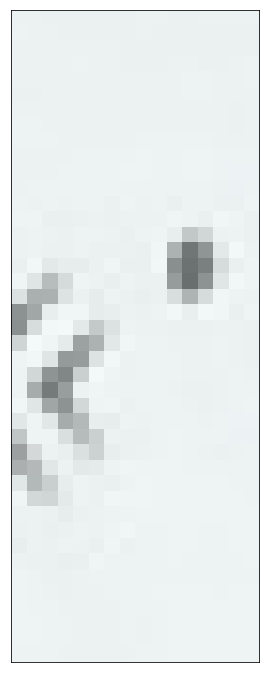

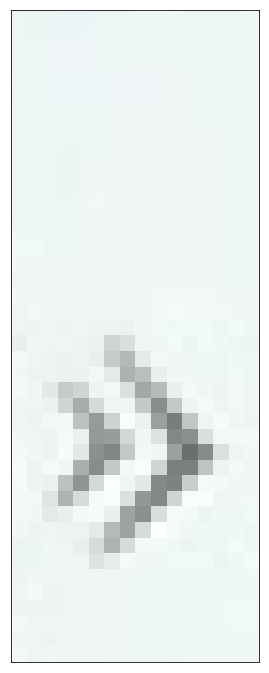

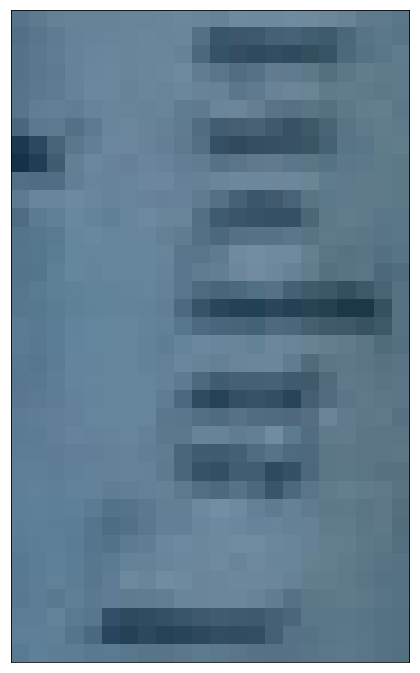

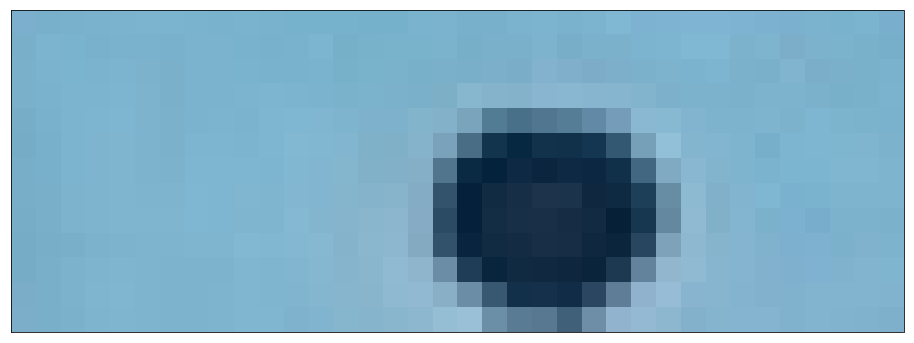

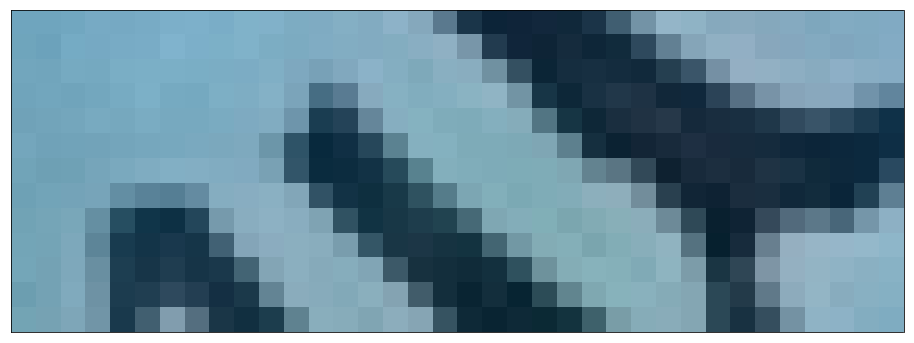

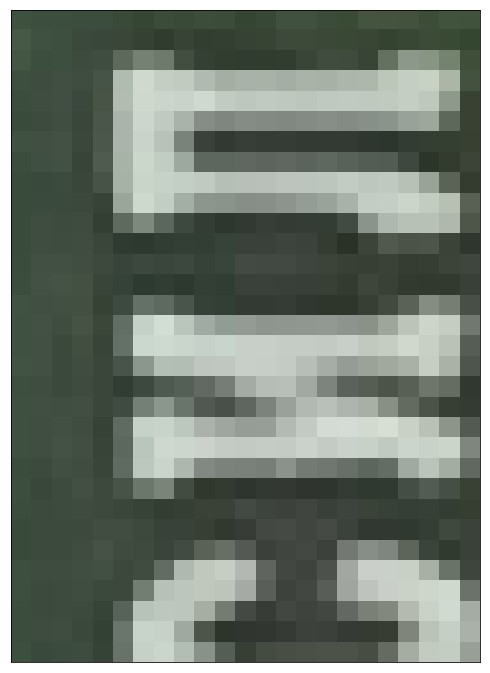

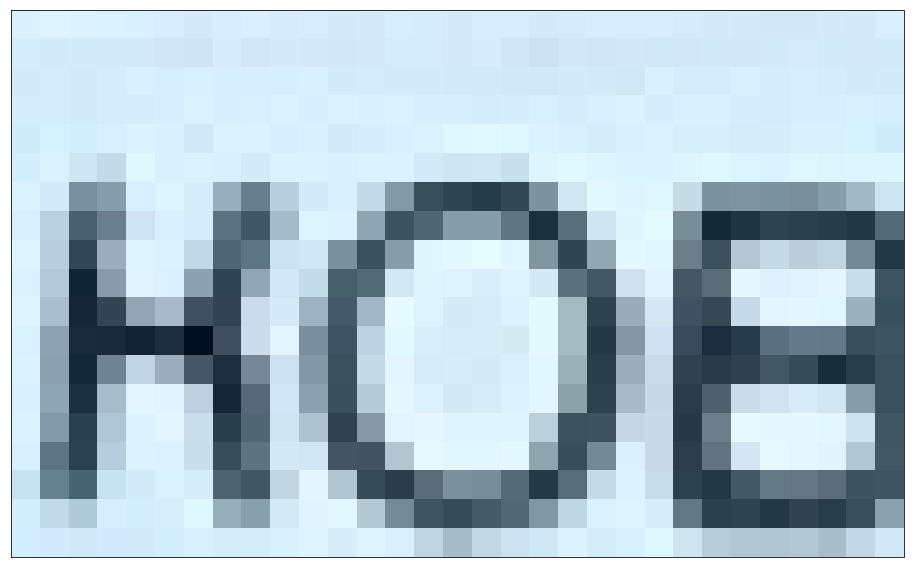

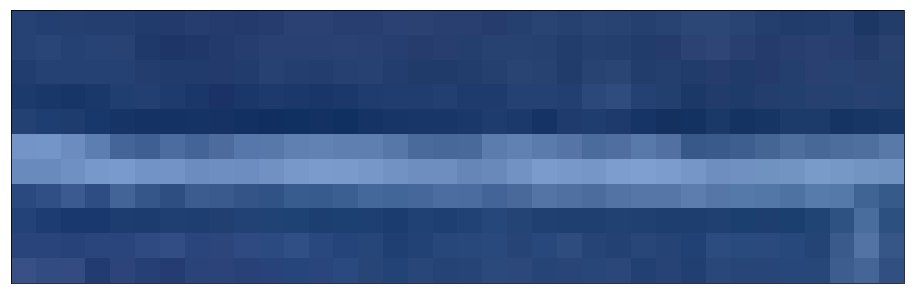

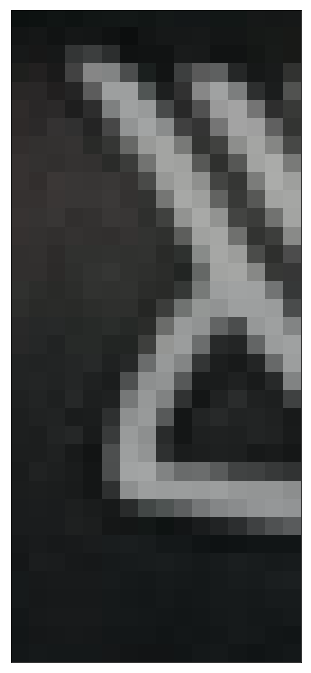

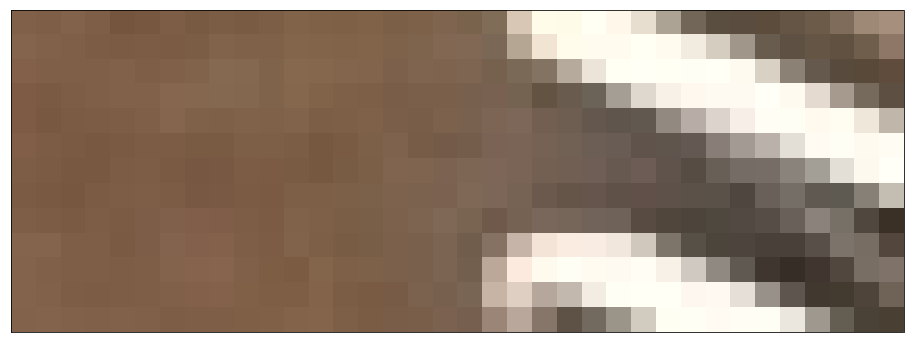

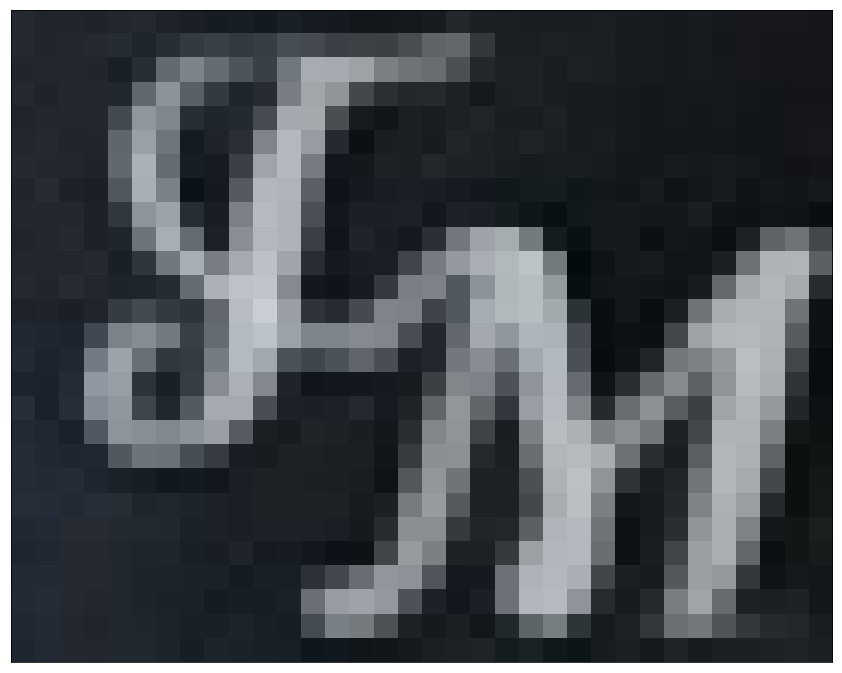

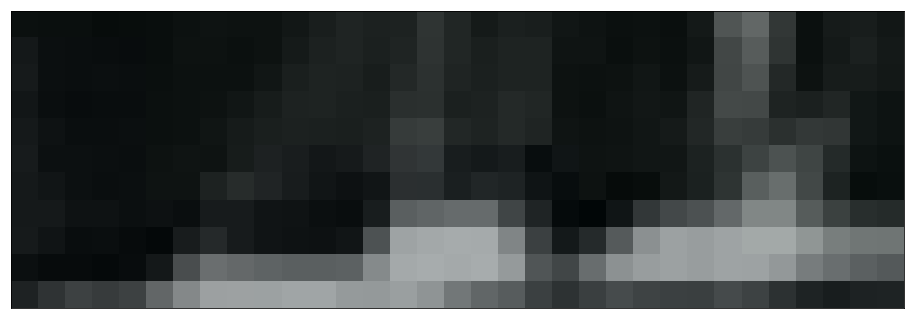

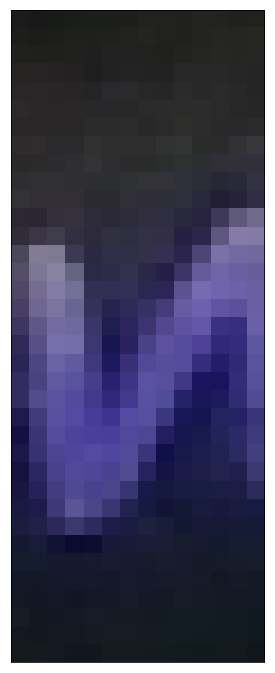

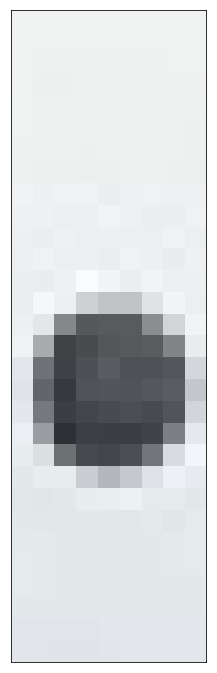

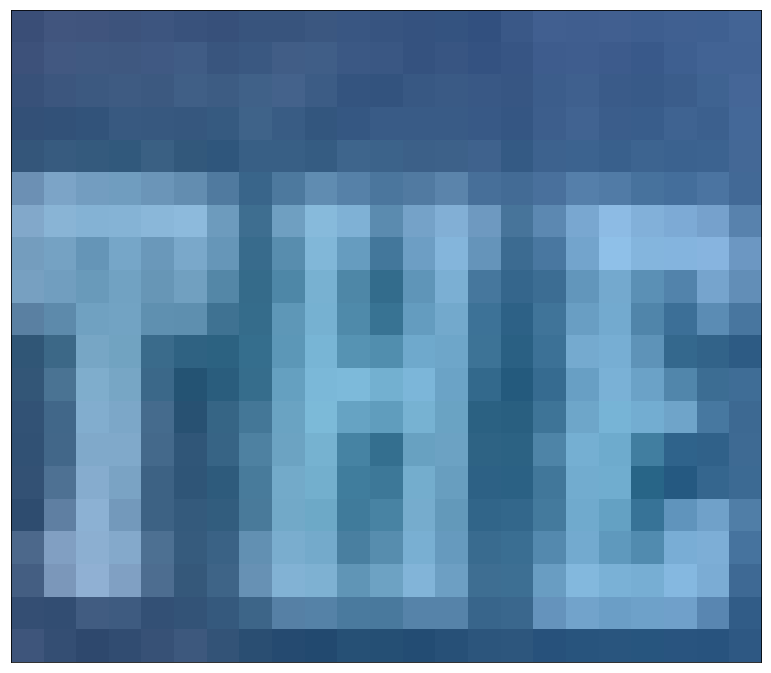

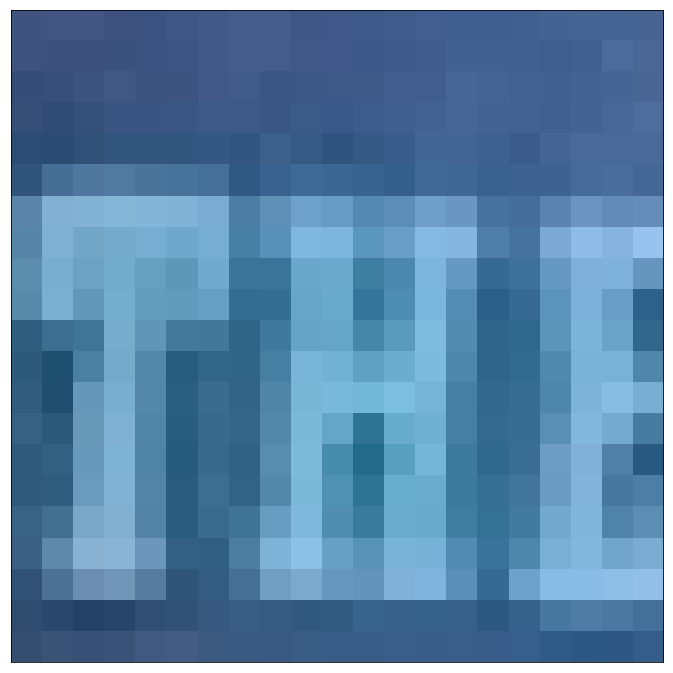

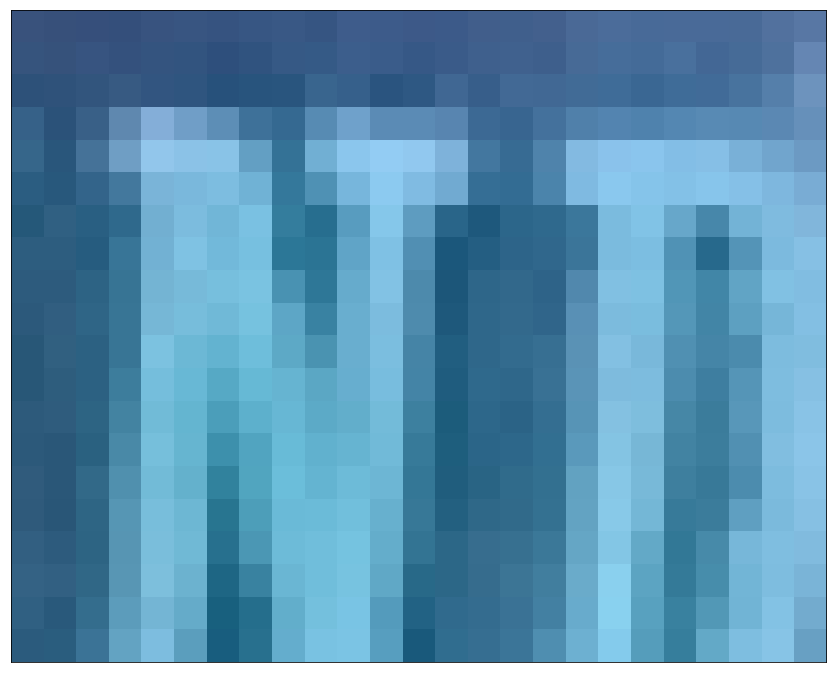

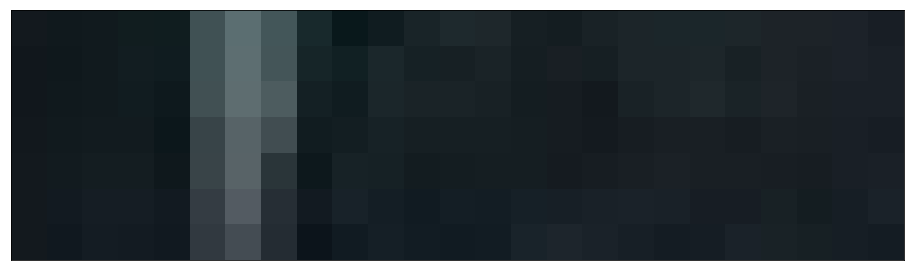

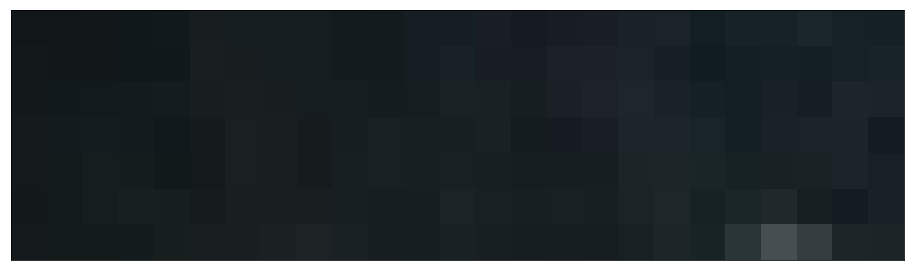

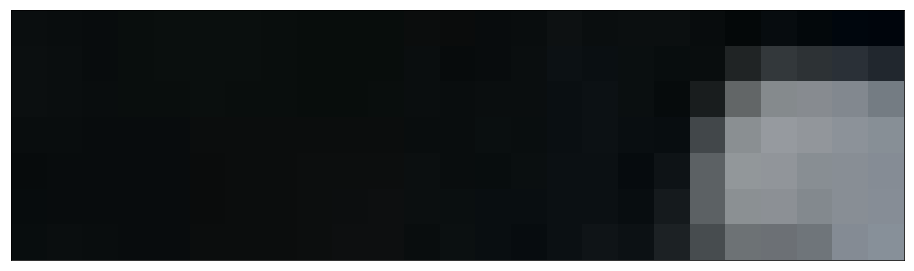

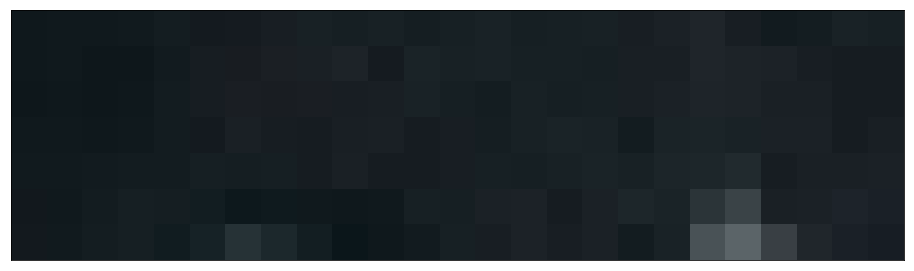

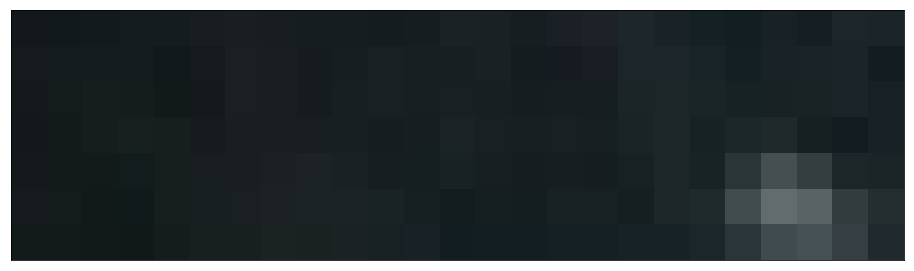

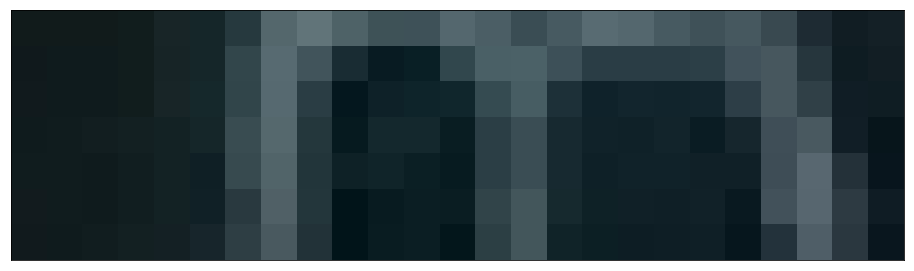

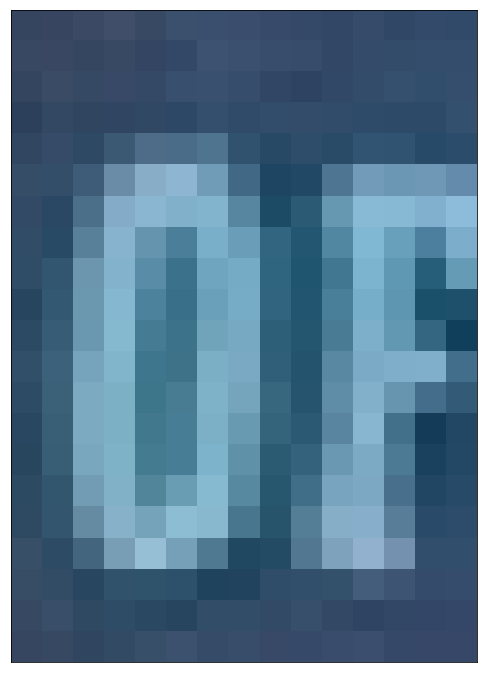

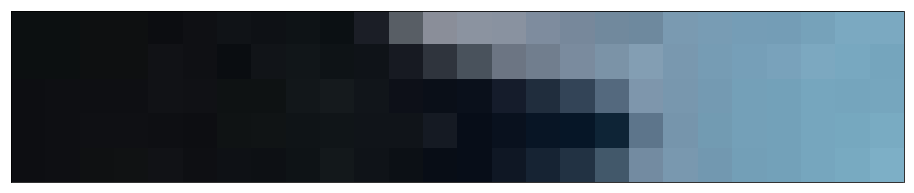

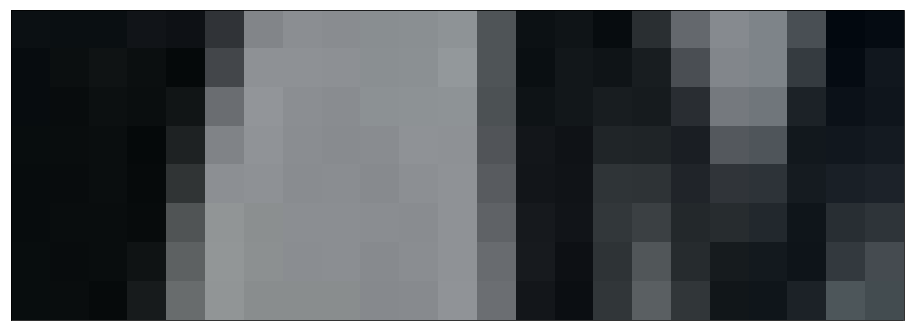

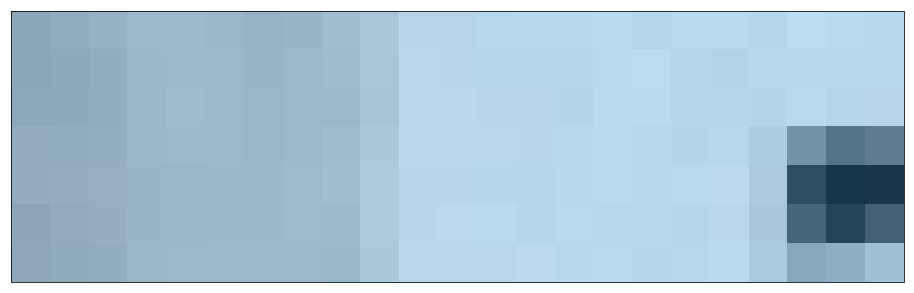

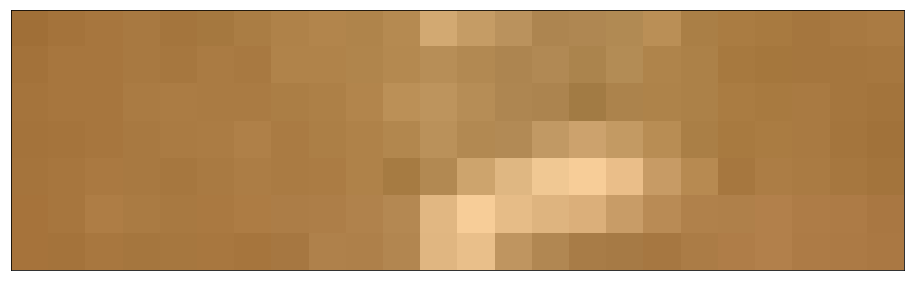

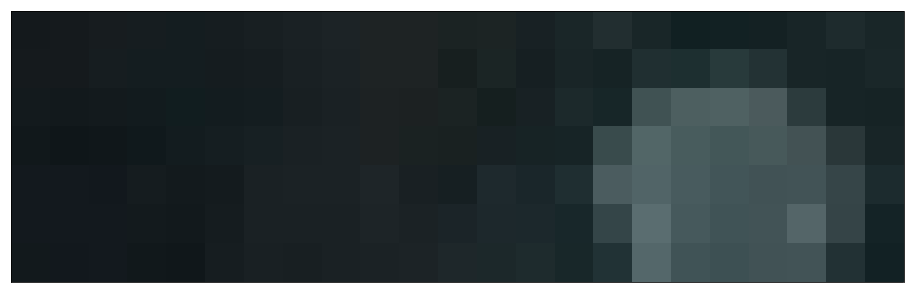

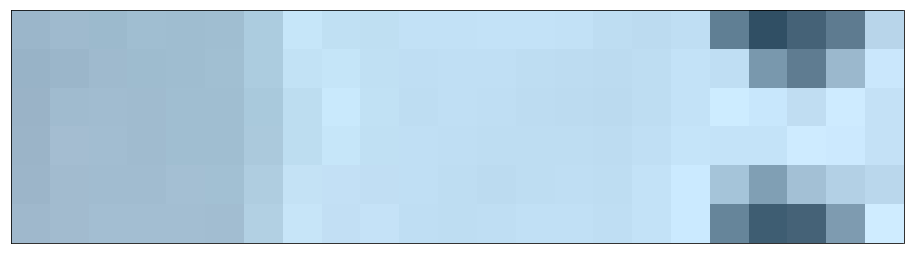

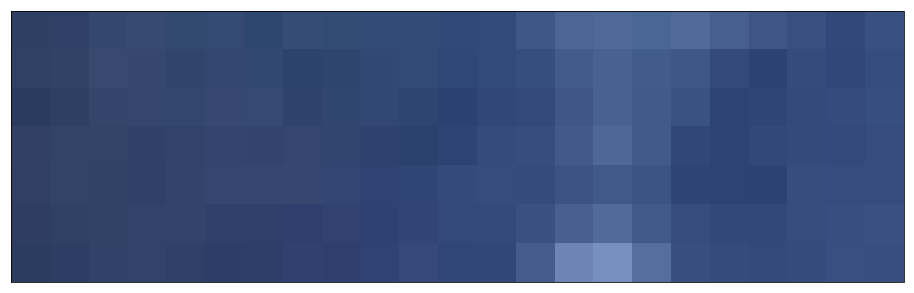

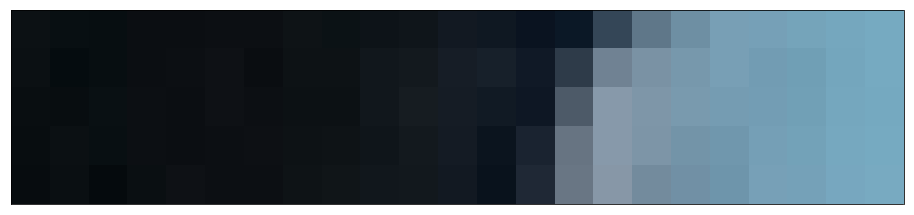

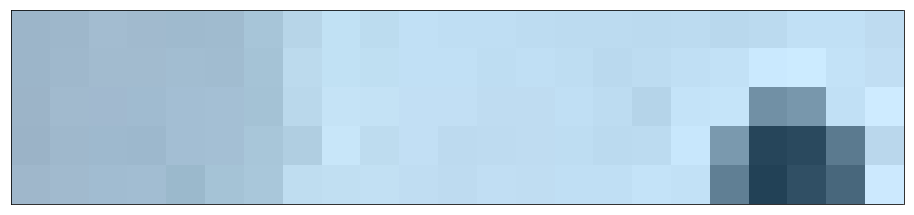

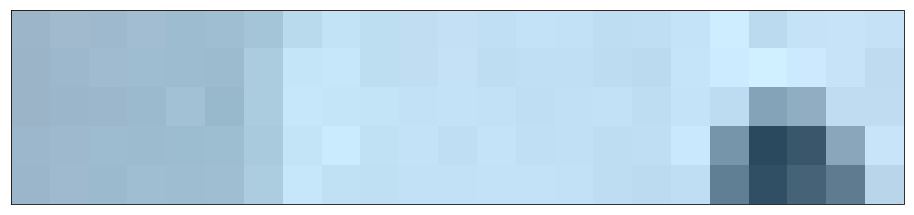

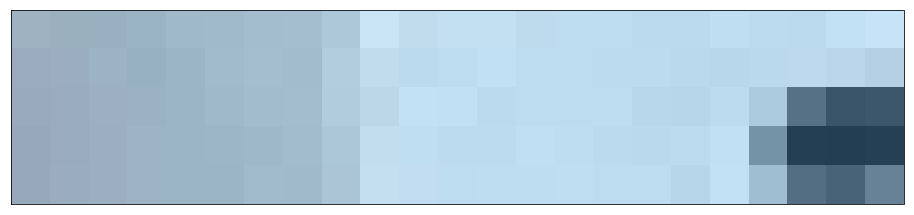

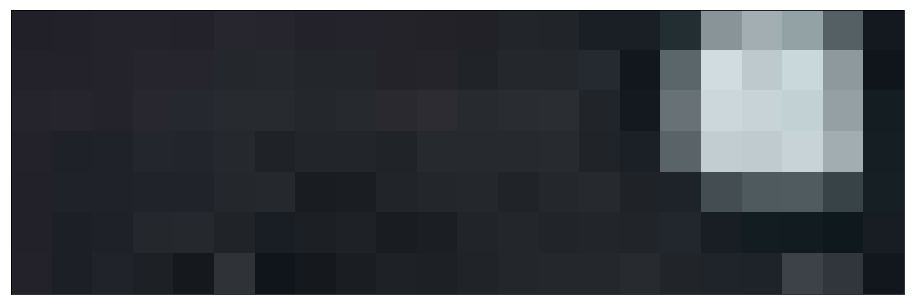

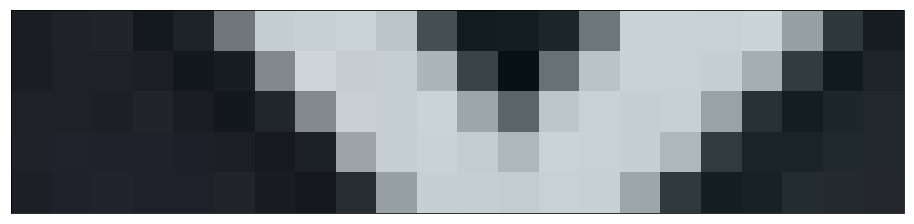

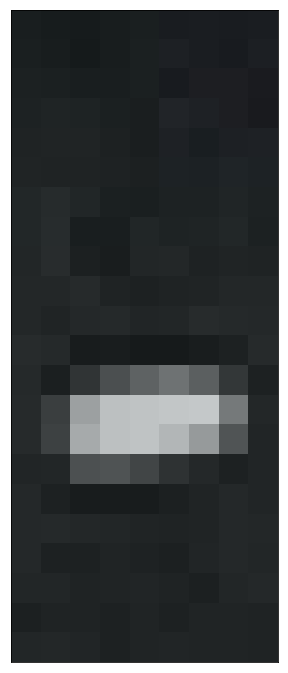

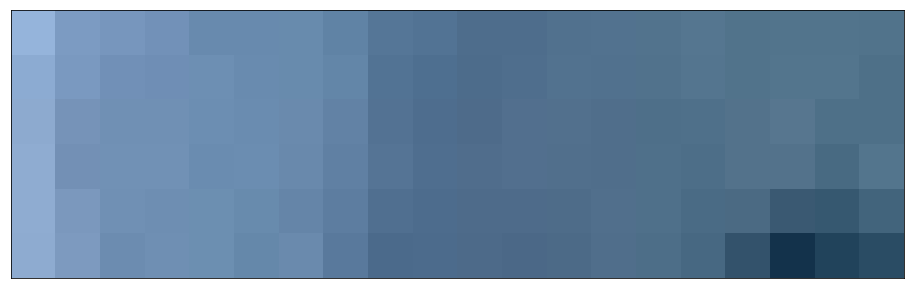

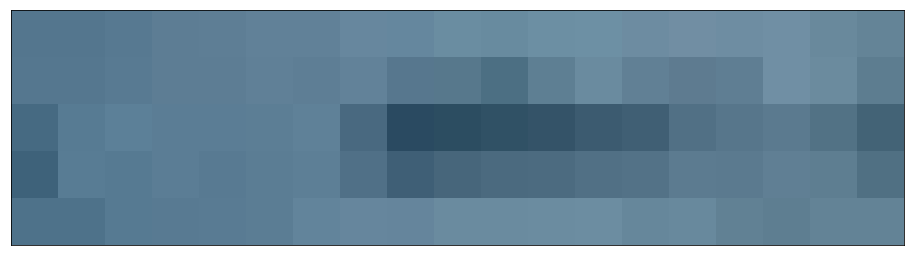

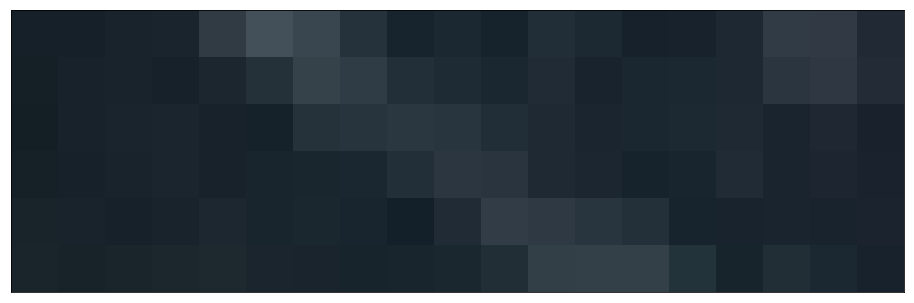

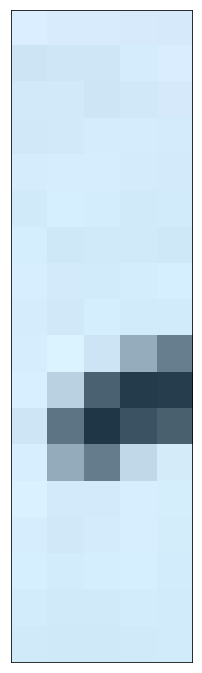

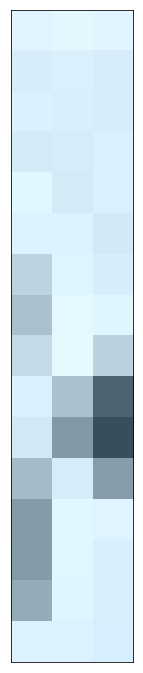

In [78]:
for i in sort_by_length[47:]:
    x,y,w,h = cv2.boundingRect(np.int0(boxes[i]/ratio))
    plot_img(oimg[y:y+h, x:x+w], show=True)

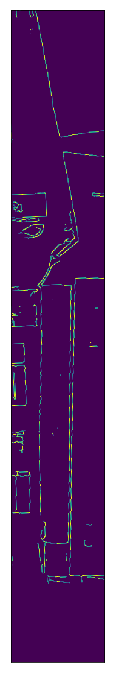

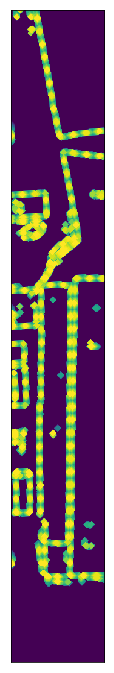

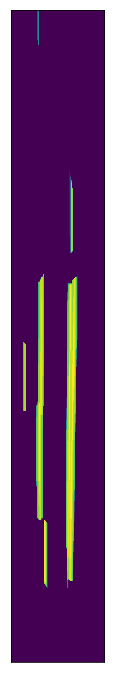

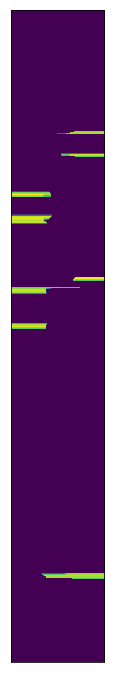

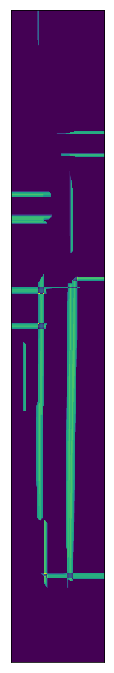

In [607]:
src = np.copy(edges_glob)
plot_img(src, show=True)

# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
thickness_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
thicker = cv2.dilate(src, thickness_kernel, iterations=5)
plot_img(thicker, show=True)

img_h = np.copy(thicker)
img_v = np.copy(thicker)

# Defining a kernel length
kernel_length = np.array(img).shape[1]//30
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_v, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
plot_img(verticle_lines_img, show=True)

# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_h, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
plot_img(horizontal_lines_img, show=True)

plot_img(horizontal_lines_img + verticle_lines_img, show=True)



In [379]:
def FindClustersWard(sections, distance, trace=False):
    
    k = np.copy(sections)
    k[:, 1][k[:, 0] > np.pi* 0.625] = - k[:, 1][k[:, 0] > np.pi* 0.625]
    k[:, 0][k[:, 0] > np.pi* 0.625] = k[:, 0][k[:, 0] > np.pi* 0.625] - np.pi
    k[:, 0] = k[:, 0] * S_K2_THETA
    k[:, 1] = k[:, 1] * S_K2_RHO
    k[:, 2] = k[:, 2] * S_K2_EPS

    Z = ward(pdist(k[:, 0:3]))
    Z = fcluster(Z, distance, criterion='distance')

    clusters = np.unique(Z)
    boxes = []
    for c in range(1, max(clusters)+1):
        box = BoxSegments(sections[Z==c])
        boxes.append(box)

    return Z, np.array(boxes)

def BoxSegments(segm):
    t, r, e, d = np.copy(segm[:,0]), np.copy(segm[:,1]), np.copy(segm[:,2]), np.copy(segm[:,3])
    
    t[t > np.pi * 0.625 ] = t[t > np.pi * 0.625 ] - np.pi
    r[t < 0] = -r[t < 0]
    
    theta = np.average(t)

    rho_min = np.amin(r * np.cos(theta - t) + e * np.sin(theta - t))
    rho_max = np.amax(r * np.cos(theta - t) + e * np.sin(theta - t))
    #print('RHO:', rho_min, rho_max)

    eps = - np.sin(theta - t) * r + e * np.cos(theta - t)
    delta = abs(d * np.cos(theta - t))

    #print('EPS: ', eps)
    #print('DELTA: ', delta)

    mi = np.amin(eps - delta/2)
    ma = np.amax(eps + delta/2)

    # Extend along rho axis for the S_RHO_EXT of book height
    delta_avg = np.average(delta)
    rho_min = rho_min - delta_avg * S_RHO_EXT
    rho_max = rho_max + delta_avg * S_RHO_EXT
    
    if theta < 0:
        theta = theta + np.pi
        rho_min = -rho_min
        rho_max = -rho_max

    x1, y1 = FromCartesian(theta, rho_min, mi)
    x2, y2 = FromCartesian(theta, rho_min, ma)
    x3, y3 = FromCartesian(theta, rho_max, ma)
    x4, y4 = FromCartesian(theta, rho_max, mi)

    box = np.int32(np.array([[x1, y1], [x2, y2], [x3,y3], [x4, y4]]))

    return box


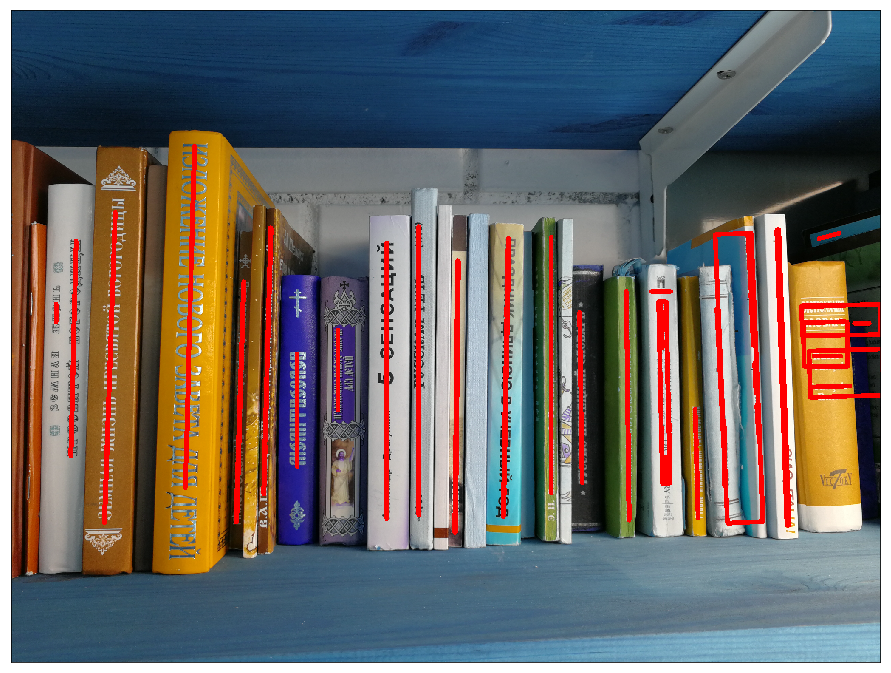

In [511]:
# Canny edges threshold one and two
S_CANNY_TH1=10  # best
S_CANNY_TH2=200  # best
S_HOUGH_TR=80 # best
# Parameters to identify segment of lines after HoughLine search:
# Minimum DBSCAN_MIN_SAM points in the DBSCAN_EPS distance in the line of width S_WIDTH 
# to consider it part of the line segment
S_WIDTH = 3 #best
DBSCAN_EPS=22 # best
DBSCAN_MIN_SAM=30 # best

# Parameters to filter noise segments after identifying segments 
# Keep only segments longer than S_MINLEN points and only segments with less 
# than S_INTERSEC intersections with other segments. Segments with angle more 
# than S_K_ANGLE are not connected
S_MINLEN = 50 # best

S_K2_THETA = 500 #best
S_K2_RHO = 10 #best
S_K2_EPS = 0.3 #best
S_RHO_EXT = 0

IMAGEFILE = "shelves/6.jpg"
response = google_res[IMAGEFILE]

oimg = cv2.imread(IMAGEFILE)
img = oimg
if img.shape[1] != 2048:
    ratio = 2048/oimg.shape[1]
    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio)

boxes = []
segms = []
for p in response.full_text_annotation.pages:
    for b in p.blocks:
        for par in b.paragraphs:
            for w in par.words:
                v = w.bounding_box.vertices
                #v = par.bounding_box.vertices
                x1, y1 = int(v[0].x * ratio), int(v[0].y * ratio)
                x2, y2 = int(v[1].x * ratio), int(v[1].y * ratio)
                x3, y3 = int(v[2].x * ratio), int(v[2].y * ratio)
                x4, y4 = int(v[3].x * ratio), int(v[3].y * ratio)
                boxes.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
                segms.append(SegmToCartesian([(x1+x4)/2, (y1+y4)/2], [(x2+x3)/2, (y2+y3)/2], weight=10000))
                #segms.append(SegmToCartesian([x2, y2], [x3, y3]))
                #segms.append(SegmToCartesian([x3, y3], [x4, y4], weight=10000))
                #segms.append(SegmToCartesian([x4, y4], [x1, y1]))
        
boxes = np.array(boxes)
text_lines = np.array(segms)

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(imgray, (S_BLUR, S_BLUR), 0)
edges = cv2.Canny(blurred, S_CANNY_TH1, S_CANNY_TH2)
for b in boxes:
    cv2.drawContours(edges, [b], 0, 0, -1)

#lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
#segments = FindSegments(lines, edges, minline=200)

#print('Numer of lines, segments: ', len(lines), len(segments))

tl = text_lines[text_lines[:, 3] > 30]
Z1, boxes = FindClustersWard(tl, 500, trace=False)

timg = np.copy(img)
color = (255, 0, 0)
for l in tl:
    theta, rho, eps, delta = l[0:4]
    x1, y1 = FromCartesian(theta, rho, eps - delta/2)
    x2, y2 = FromCartesian(theta, rho, eps + delta/2)
    cv2.line(timg, (x1, y1), (x2, y2), color, 10)

for b in boxes:
    cv2.drawContours(timg, [b], 0, (255, 0, 0), 10)
    
color = (0, 255, 0)
#for s in segments:
#    x1, y1 = s[0]
#    x2, y2 = s[1]
#    cv2.line(timg, (x1, y1), (x2, y2), color, 5)

plot_img(timg, show=True)






False


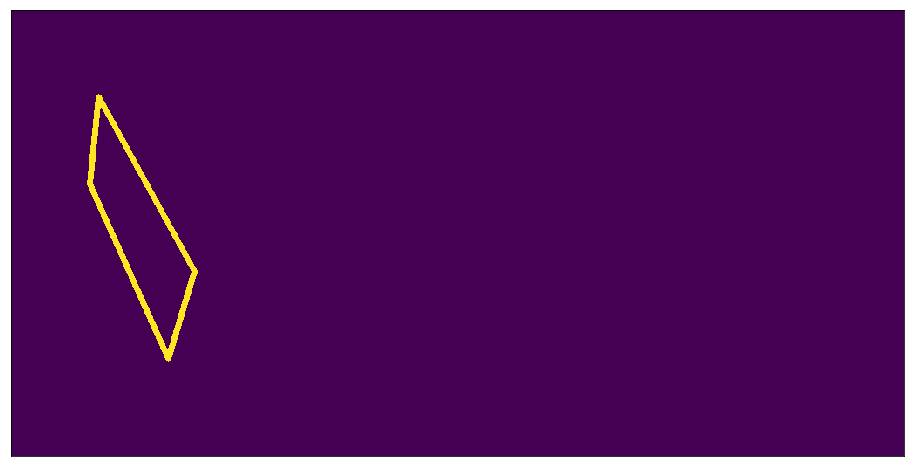

In [470]:
#l1 = np.array([[100, 100], [200, 100]])
#l2 = np.array([[200, 100], [200, 200]])
#l3 = np.array([[200, 200], [100, 200]])
#l4 = np.array([[100, 200], [100, 100]])

#c1 = GetIntersection(l1[0], l1[1], l2[0], l2[1])
#c2 = GetIntersection(l2[0], l2[1], l3[0], l3[1])
#c3 = GetIntersection(l3[0], l3[1], l4[0], l4[1])
#c4 = GetIntersection(l4[0], l4[1], l1[0], l1[1])
def LineSide(p1, p2, p):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]
    x, y = p[0], p[1]
    return np.sign((x2-x1)*(y-y1) - (y2-y1)*(x-x1))
    

def IsInside(box, p):
    p1, p2, p3, p4 = box[0], box[1], box[2], box[3]
    s1 = LineSide(p1, p2, p)
    s2 = LineSide(p2, p3, p)
    s3 = LineSide(p3, p4, p)
    s4 = LineSide(p4, p1, p)
    
    return s1 == s2 == s3 == s4
   

box = np.array([[100, 100], [210, 300], [180, 400], [90, 200]])

print(IsInside(box, (200, 100)))

timg = np.zeros((512, 1024))
color = 255
cv2.drawContours(timg, [box], 0, color, 5)
plot_img(timg, show=True)








In [11]:
a = np.array([[101, 102, 103, 104, 105, 106],
              [101, 202, 203, 104, 105, 106],
              [101, 302, 303, 104, 105, 106]])
print(a[:, 1:3].reshape((-1,2))-(100, 200))

[[  2 -97]
 [102   3]
 [202 103]]
